In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [6]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [7]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [8]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [9]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

30359.97

In [10]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [11]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [12]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-06 05:00:00+00:00  28086.02  28197.42  27724.33  28044.99   
        2023-04-07 05:00:00+00:00  28042.19  28080.08  27782.43  27999.42   
        2023-04-08 05:00:00+00:00  28000.11  28180.00  27885.74  28055.08   
        2023-04-09 05:00:00+00:00  28055.09  28551.55  27817.06  28259.98   
        2023-04-10 05:00:00+00:00  28261.60  30442.56  28179.00  30366.31   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-04-06 05:00:00+00:00  6361.327530     105691.0  27997.279878  
        2023-04-07 05:00:00+00:00  4015.262640      82793.0  27924.334599  
        2023-04-08 05:00:00+00:00  2321.540070      45629.0  28027.762592  
        2023-04-09 05:00:00+00:00  4613.152460      73492.0  28170.555198  
        2023-04-10 05:00:00+00:00  9739.608318     141760.0  29189.449266  

[1068 rows x 7 columns]

In [13]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-06 05:00:00+00:00  28086.02  28197.42  27724.33  28044.99   
        2023-04-07 05:00:00+00:00  28042.19  28080.08  27782.43  27999.42   
        2023-04-08 05:00:00+00:00  28000.11  28180.00  27885.74  28055.08   
        2023-04-09 05:00:00+00:00  28055.09  28551.55  27817.06  28259.98   
        2023-04-10 05:00:00+00:00  28261.60  30442.56  28179.00  30366.31   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-04-06 05:00:00+00:00  6361.327530     105691.0  27997.279878  
        2023-04-07 05:00:00+00:00  4015.262640      82793.0  27924.334599  
        2023-04-08 05:00:00+00:00  2321.540070      45629.0  28027.762592  
        2023-04-09 05:00:00+00:00  4613.152460      73492.0  28170.555198  
        2023-04-10 05:00:00+00:00  9739.608318     141760.0  29189.449266  

[1068 rows x 7 columns]

In [14]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1068 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-04-10 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1068 non-null   float64
 1   high         1068 non-null   float64
 2   low          1068 non-null   float64
 3   close        1068 non-null   float64
 4   volume       1068 non-null   float64
 5   trade_count  1068 non-null   float64
 6   vwap         1068 non-null   float64
dtypes: float64(7)
memory usage: 102.4+ KB


In [15]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

symbol                 timestamp      open      high       low  \
0     BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   
1     BTC/USD 2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   
2     BTC/USD 2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   
3     BTC/USD 2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   
4     BTC/USD 2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   
...       ...                       ...       ...       ...       ...   
1063  BTC/USD 2023-04-06 05:00:00+00:00  28086.02  28197.42  27724.33   
1064  BTC/USD 2023-04-07 05:00:00+00:00  28042.19  28080.08  27782.43   
1065  BTC/USD 2023-04-08 05:00:00+00:00  28000.11  28180.00  27885.74   
1066  BTC/USD 2023-04-09 05:00:00+00:00  28055.09  28551.55  27817.06   
1067  BTC/USD 2023-04-10 05:00:00+00:00  28261.60  30442.56  28179.00   

         close       volume  trade_count          vwap  
0      7314.00     0.000100          1.0   7314.000000  
1      7100.00     0.000200          2.0   7100.750000  
2      7118.50     0.000100          1.0   7118.500000  
3      7836.00     0.084000          2.0   7835.687500  
4      8653.00     0.013400          3.0   8715.805970  
...        ...          ...          ...           ...  
1063  28044.99  6361.327530     105691.0  27997.279878  
1064  27999.42  4015.262640      82793.0  27924.334599  
1065  28055.08  2321.540070      45629.0  28027.762592  
1066  28259.98  4613.152460      73492.0  28170.555198  
1067  30366.31  9739.608318     141760.0  29189.449266  

[1068 rows x 9 columns]

In [16]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

symbol   timestamp      open      high       low     close  \
0     BTC/USD  2020-04-08   7314.00   7314.00   7314.00   7314.00   
1     BTC/USD  2020-04-14   7101.50   7101.50   7100.00   7100.00   
2     BTC/USD  2020-04-22   7118.50   7118.50   7118.50   7118.50   
3     BTC/USD  2020-04-28   7748.50   7836.00   7748.50   7836.00   
4     BTC/USD  2020-04-30   8829.00   8829.00   8653.00   8653.00   
...       ...         ...       ...       ...       ...       ...   
1063  BTC/USD  2023-04-06  28086.02  28197.42  27724.33  28044.99   
1064  BTC/USD  2023-04-07  28042.19  28080.08  27782.43  27999.42   
1065  BTC/USD  2023-04-08  28000.11  28180.00  27885.74  28055.08   
1066  BTC/USD  2023-04-09  28055.09  28551.55  27817.06  28259.98   
1067  BTC/USD  2023-04-10  28261.60  30442.56  28179.00  30366.31   

           volume  trade_count          vwap  
0        0.000100          1.0   7314.000000  
1        0.000200          2.0   7100.750000  
2        0.000100          1.0   7118.500000  
3        0.084000          2.0   7835.687500  
4        0.013400          3.0   8715.805970  
...           ...          ...           ...  
1063  6361.327530     105691.0  27997.279878  
1064  4015.262640      82793.0  27924.334599  
1065  2321.540070      45629.0  28027.762592  
1066  4613.152460      73492.0  28170.555198  
1067  9739.608318     141760.0  29189.449266  

[1068 rows x 9 columns]

In [17]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol       BTC/USD
timestamp           
2020-04-08   7314.00
2020-04-14   7100.00
2020-04-22   7118.50
2020-04-28   7836.00
2020-04-30   8653.00
...              ...
2023-04-06  28044.99
2023-04-07  27999.42
2023-04-08  28055.08
2023-04-09  28259.98
2023-04-10  30366.31

[1068 rows x 1 columns]

In [18]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [19]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol       BTC/USD
timestamp           
2020-04-08       NaN
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
...              ...
2023-04-06 -0.001582
2023-04-07 -0.001625
2023-04-08  0.001988
2023-04-09  0.007303
2023-04-10  0.074534

[1068 rows x 1 columns]

In [20]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [21]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol       BTC/USD
timestamp           
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
2020-05-01  0.018895
...              ...
2023-04-06 -0.001582
2023-04-07 -0.001625
2023-04-08  0.001988
2023-04-09  0.007303
2023-04-10  0.074534

[1067 rows x 1 columns]

In [22]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 2020-04-14 to 2023-04-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1067 non-null   float64
dtypes: float64(1)
memory usage: 16.7+ KB


In [23]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [24]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [25]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [26]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [27]:
# Display as dataframe
historical_quotes.df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-03 04:00:00+00:00  105.88  107.0950  105.7000  106.60   
       2023-04-04 04:00:00+00:00  105.78  107.8000  105.7500  107.13   
       2023-04-05 04:00:00+00:00  107.77  108.3700  107.4100  108.25   
       2023-04-06 04:00:00+00:00  108.42  108.8700  108.3900  108.53   
       2023-04-10 04:00:00+00:00  107.64  107.7618  106.5600  106.78   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-03 04:00:00+00:00  18237429.0     111192.0  106.534448  
       2023-04-04 04:00:00+00:00  18052734.0     110253.0  107.222297  
       2023-04-05 04:00:00+00:00  23069677.0     141394.0  108.108906  
       2023-04-06 04:00:00+00:00  16447295.0      92370.0  108.599296  
       2023-04-10 04:00:00+00:00  19869749.0     103772.0  106.943490  

[2268 rows x 7 columns]

In [28]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-03 04:00:00+00:00  105.88  107.0950  105.7000  106.60   
       2023-04-04 04:00:00+00:00  105.78  107.8000  105.7500  107.13   
       2023-04-05 04:00:00+00:00  107.77  108.3700  107.4100  108.25   
       2023-04-06 04:00:00+00:00  108.42  108.8700  108.3900  108.53   
       2023-04-10 04:00:00+00:00  107.64  107.7618  106.5600  106.78   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-03 04:00:00+00:00  18237429.0     111192.0  106.534448  
       2023-04-04 04:00:00+00:00  18052734.0     110253.0  107.222297  
       2023-04-05 04:00:00+00:00  23069677.0     141394.0  108.108906  
       2023-04-06 04:00:00+00:00  16447295.0      92370.0  108.599296  
       2023-04-10 04:00:00+00:00  19869749.0     103772.0  106.943490  

[2268 rows x 7 columns]

In [29]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2268 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-04-10 04:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2268 non-null   float64
 1   high         2268 non-null   float64
 2   low          2268 non-null   float64
 3   close        2268 non-null   float64
 4   volume       2268 non-null   float64
 5   trade_count  2268 non-null   float64
 6   vwap         2268 non-null   float64
dtypes: float64(7)
memory usage: 153.0+ KB


In [30]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

symbol                 timestamp    open      high       low   close  \
0       GLD 2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
1       GLD 2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
2       GLD 2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
3       GLD 2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
4       GLD 2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...     ...                       ...     ...       ...       ...     ...   
2263    TLT 2023-04-03 04:00:00+00:00  105.88  107.0950  105.7000  106.60   
2264    TLT 2023-04-04 04:00:00+00:00  105.78  107.8000  105.7500  107.13   
2265    TLT 2023-04-05 04:00:00+00:00  107.77  108.3700  107.4100  108.25   
2266    TLT 2023-04-06 04:00:00+00:00  108.42  108.8700  108.3900  108.53   
2267    TLT 2023-04-10 04:00:00+00:00  107.64  107.7618  106.5600  106.78   

          volume  trade_count        vwap  
0      7600804.0      60704.0  155.233884  
1     18123039.0     140239.0  158.255634  
2     20549213.0     140401.0  160.906373  
3     17095086.0     146336.0  163.197557  
4     12141890.0      95518.0  161.749049  
...          ...          ...         ...  
2263  18237429.0     111192.0  106.534448  
2264  18052734.0     110253.0  107.222297  
2265  23069677.0     141394.0  108.108906  
2266  16447295.0      92370.0  108.599296  
2267  19869749.0     103772.0  106.943490  

[2268 rows x 9 columns]

In [31]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2268 non-null   object             
 1   timestamp    2268 non-null   datetime64[ns, UTC]
 2   open         2268 non-null   float64            
 3   high         2268 non-null   float64            
 4   low          2268 non-null   float64            
 5   close        2268 non-null   float64            
 6   volume       2268 non-null   float64            
 7   trade_count  2268 non-null   float64            
 8   vwap         2268 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 159.6+ KB


In [32]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

symbol   timestamp    open      high       low   close      volume  \
0       GLD  2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD  2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD  2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD  2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD  2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...         ...     ...       ...       ...     ...         ...   
2263    TLT  2023-04-03  105.88  107.0950  105.7000  106.60  18237429.0   
2264    TLT  2023-04-04  105.78  107.8000  105.7500  107.13  18052734.0   
2265    TLT  2023-04-05  107.77  108.3700  107.4100  108.25  23069677.0   
2266    TLT  2023-04-06  108.42  108.8700  108.3900  108.53  16447295.0   
2267    TLT  2023-04-10  107.64  107.7618  106.5600  106.78  19869749.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2263     111192.0  106.534448  
2264     110253.0  107.222297  
2265     141394.0  108.108906  
2266      92370.0  108.599296  
2267     103772.0  106.943490  

[2268 rows x 9 columns]

In [33]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

symbol   timestamp    open      high       low   close       volume  \
756     SPY  2020-04-08  267.96  276.0000  265.2542  274.00  153774487.0   
757     SPY  2020-04-09  277.58  281.2000  275.4700  278.22  190283195.0   
758     SPY  2020-04-13  277.14  277.5100  271.4100  275.63  114868253.0   
759     SPY  2020-04-14  280.98  284.9000  275.5106  283.80  134143470.0   
760     SPY  2020-04-15  277.57  283.9407  275.4600  277.75  121779042.0   
...     ...         ...     ...       ...       ...     ...          ...   
1507    SPY  2023-04-03  408.85  411.3700  408.4400  410.95   67426048.0   
1508    SPY  2023-04-04  411.62  411.9200  407.2400  408.67   66638607.0   
1509    SPY  2023-04-05  407.91  408.7000  405.8800  407.60   65221970.0   
1510    SPY  2023-04-06  406.77  409.4800  405.6780  409.19   63743345.0   
1511    SPY  2023-04-10  406.61  409.6900  405.9700  409.61   63396336.0   

      trade_count        vwap  
756      950859.0  271.051454  
757     1171999.0  278.251697  
758      752225.0  274.512847  
759      761246.0  282.089774  
760      711140.0  277.826041  
...           ...         ...  
1507     570247.0  410.040240  
1508     537448.0  409.192078  
1509     524617.0  407.326909  
1510     482110.0  408.101856  
1511     465664.0  408.085790  

[756 rows x 9 columns]

In [34]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol         SPY
timestamp         
2020-04-08  274.00
2020-04-09  278.22
2020-04-13  275.63
2020-04-14  283.80
2020-04-15  277.75
...            ...
2023-04-03  410.95
2023-04-04  408.67
2023-04-05  407.60
2023-04-06  409.19
2023-04-10  409.61

[756 rows x 1 columns]

In [35]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-04-08 to 2023-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     756 non-null    float64
dtypes: float64(1)
memory usage: 11.8+ KB


In [36]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol           SPY
timestamp           
2020-04-08       NaN
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
...              ...
2023-04-03  0.003811
2023-04-04 -0.005548
2023-04-05 -0.002618
2023-04-06  0.003901
2023-04-10  0.001026

[756 rows x 1 columns]

In [37]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol           SPY
timestamp           
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
2020-04-16  0.004356
...              ...
2023-04-03  0.003811
2023-04-04 -0.005548
2023-04-05 -0.002618
2023-04-06  0.003901
2023-04-10  0.001026

[755 rows x 1 columns]

In [38]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

symbol   timestamp      open     high       low   close      volume  \
0      GLD  2020-04-08  155.9100  155.940  154.5900  154.65   7600804.0   
1      GLD  2020-04-09  158.0800  159.080  157.2100  158.58  18123039.0   
2      GLD  2020-04-13  159.1700  162.380  158.6250  161.41  20549213.0   
3      GLD  2020-04-14  162.7300  164.420  161.7800  162.66  17095086.0   
4      GLD  2020-04-15  161.8000  162.540  160.8061  162.00  12141890.0   
..     ...         ...       ...      ...       ...     ...         ...   
751    GLD  2023-04-03  183.8500  185.035  183.3200  184.54   9206828.0   
752    GLD  2023-04-04  184.7224  188.230  184.6600  187.98  13768517.0   
753    GLD  2023-04-05  188.3400  188.860  186.7800  187.83  11445794.0   
754    GLD  2023-04-06  186.8901  187.260  185.9500  186.49   6648428.0   
755    GLD  2023-04-10  185.1800  185.360  184.1900  185.11   6403953.0   

     trade_count        vwap  
0        60704.0  155.233884  
1       140239.0  158.255634  
2       140401.0  160.906373  
3       146336.0  163.197557  
4        95518.0  161.749049  
..           ...         ...  
751      70298.0  184.423684  
752     106203.0  187.365655  
753      85516.0  187.919661  
754      61184.0  186.697522  
755      57876.0  184.924980  

[756 rows x 9 columns]

In [39]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol         GLD
timestamp         
2020-04-08  154.65
2020-04-09  158.58
2020-04-13  161.41
2020-04-14  162.66
2020-04-15  162.00
...            ...
2023-04-03  184.54
2023-04-04  187.98
2023-04-05  187.83
2023-04-06  186.49
2023-04-10  185.11

[756 rows x 1 columns]

In [40]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-04-08 to 2023-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     756 non-null    float64
dtypes: float64(1)
memory usage: 11.8+ KB


In [41]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol           GLD
timestamp           
2020-04-08       NaN
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
...              ...
2023-04-03  0.007204
2023-04-04  0.018641
2023-04-05 -0.000798
2023-04-06 -0.007134
2023-04-10 -0.007400

[756 rows x 1 columns]

In [42]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol           GLD
timestamp           
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
2020-04-16 -0.001790
...              ...
2023-04-03  0.007204
2023-04-04  0.018641
2023-04-05 -0.000798
2023-04-06 -0.007134
2023-04-10 -0.007400

[755 rows x 1 columns]

In [43]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

symbol   timestamp    open      high     low   close      volume  \
1512    TLT  2020-04-08  165.11  166.1900  164.13  165.09  10147077.0   
1513    TLT  2020-04-09  164.28  165.7900  163.78  165.39  14260806.0   
1514    TLT  2020-04-13  164.75  165.7100  163.88  163.88   8750297.0   
1515    TLT  2020-04-14  163.84  164.7400  163.48  163.84   9019531.0   
1516    TLT  2020-04-15  166.80  168.6000  166.74  168.18  10027752.0   
...     ...         ...     ...       ...     ...     ...         ...   
2263    TLT  2023-04-03  105.88  107.0950  105.70  106.60  18237429.0   
2264    TLT  2023-04-04  105.78  107.8000  105.75  107.13  18052734.0   
2265    TLT  2023-04-05  107.77  108.3700  107.41  108.25  23069677.0   
2266    TLT  2023-04-06  108.42  108.8700  108.39  108.53  16447295.0   
2267    TLT  2023-04-10  107.64  107.7618  106.56  106.78  19869749.0   

      trade_count        vwap  
1512      63686.0  165.217491  
1513      82515.0  164.996594  
1514      60771.0  164.679842  
1515      62051.0  164.073826  
1516      63827.0  167.874800  
...           ...         ...  
2263     111192.0  106.534448  
2264     110253.0  107.222297  
2265     141394.0  108.108906  
2266      92370.0  108.599296  
2267     103772.0  106.943490  

[756 rows x 9 columns]

In [44]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol         TLT
timestamp         
2020-04-08  165.09
2020-04-09  165.39
2020-04-13  163.88
2020-04-14  163.84
2020-04-15  168.18
...            ...
2023-04-03  106.60
2023-04-04  107.13
2023-04-05  108.25
2023-04-06  108.53
2023-04-10  106.78

[756 rows x 1 columns]

In [45]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 2020-04-08 to 2023-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     756 non-null    float64
dtypes: float64(1)
memory usage: 11.8+ KB


In [46]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol           TLT
timestamp           
2020-04-08       NaN
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
...              ...
2023-04-03  0.002162
2023-04-04  0.004972
2023-04-05  0.010455
2023-04-06  0.002587
2023-04-10 -0.016125

[756 rows x 1 columns]

In [47]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol           TLT
timestamp           
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
2020-04-16  0.011357
...              ...
2023-04-03  0.002162
2023-04-04  0.004972
2023-04-05  0.010455
2023-04-06  0.002587
2023-04-10 -0.016125

[755 rows x 1 columns]

In [48]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod

symbol       BTC/USD
timestamp           
2020-04-14  0.970741
2020-04-22  0.973270
2020-04-28  1.071370
2020-04-30  1.183074
2020-05-01  1.205428
...              ...
2023-04-06  3.834426
2023-04-07  3.828195
2023-04-08  3.835805
2023-04-09  3.863820
2023-04-10  4.151806

[1067 rows x 1 columns]

In [49]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod

symbol           SPY
timestamp           
2020-04-09  1.015401
2020-04-13  1.005949
2020-04-14  1.035766
2020-04-15  1.013686
2020-04-16  1.018102
...              ...
2023-04-03  1.499818
2023-04-04  1.491496
2023-04-05  1.487591
2023-04-06  1.493394
2023-04-10  1.494927

[755 rows x 1 columns]

In [50]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod

symbol           GLD
timestamp           
2020-04-09  1.025412
2020-04-13  1.043712
2020-04-14  1.051794
2020-04-15  1.047527
2020-04-16  1.045651
...              ...
2023-04-03  1.193275
2023-04-04  1.215519
2023-04-05  1.214549
2023-04-06  1.205884
2023-04-10  1.196961

[755 rows x 1 columns]

In [51]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod

symbol           TLT
timestamp           
2020-04-09  1.001817
2020-04-13  0.992671
2020-04-14  0.992428
2020-04-15  1.018717
2020-04-16  1.030287
...              ...
2023-04-03  0.645708
2023-04-04  0.648919
2023-04-05  0.655703
2023-04-06  0.657399
2023-04-10  0.646799

[755 rows x 1 columns]

In [52]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit

symbol           BTC/USD
timestamp               
2020-04-14   9707.410446
2020-04-22   9732.704403
2020-04-28  10713.699754
2020-04-30  11830.735576
2020-05-01  12054.279464
...                  ...
2023-04-06  38344.257588
2023-04-07  38281.952420
2023-04-08  38358.053049
2023-04-09  38638.200711
2023-04-10  41518.061252

[1067 rows x 1 columns]

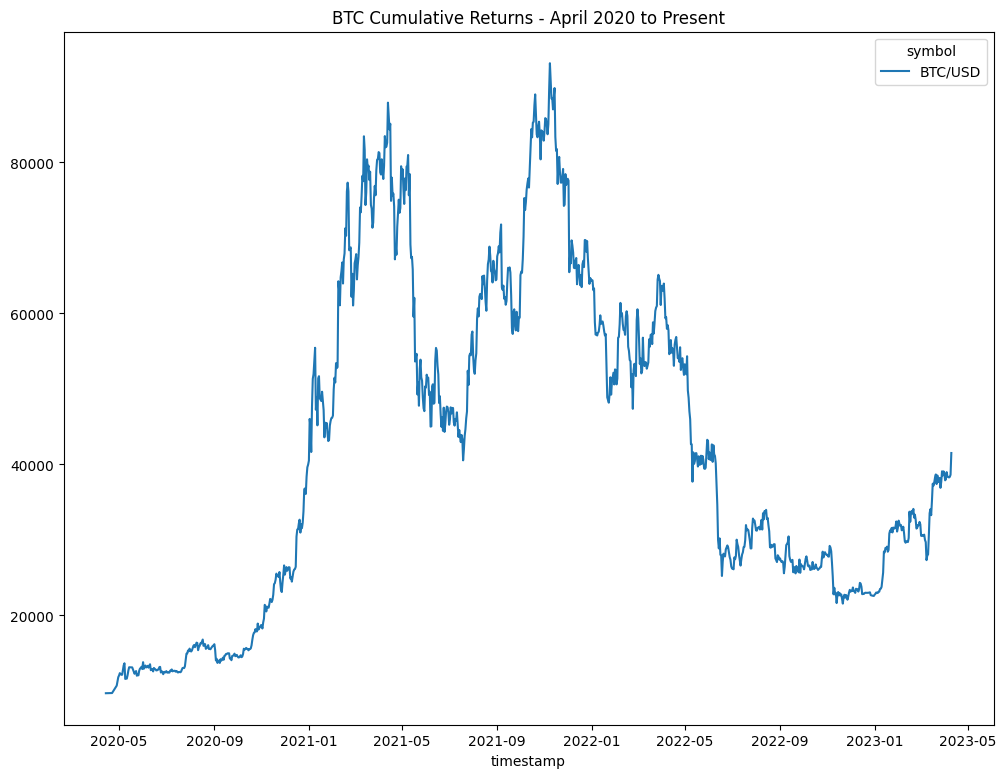

In [53]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(12,9), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [54]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit

symbol               SPY
timestamp               
2020-04-09  10154.014599
2020-04-13  10059.489051
2020-04-14  10357.664234
2020-04-15  10136.861314
2020-04-16  10181.021898
...                  ...
2023-04-03  14998.175182
2023-04-04  14914.963504
2023-04-05  14875.912409
2023-04-06  14933.941606
2023-04-10  14949.270073

[755 rows x 1 columns]

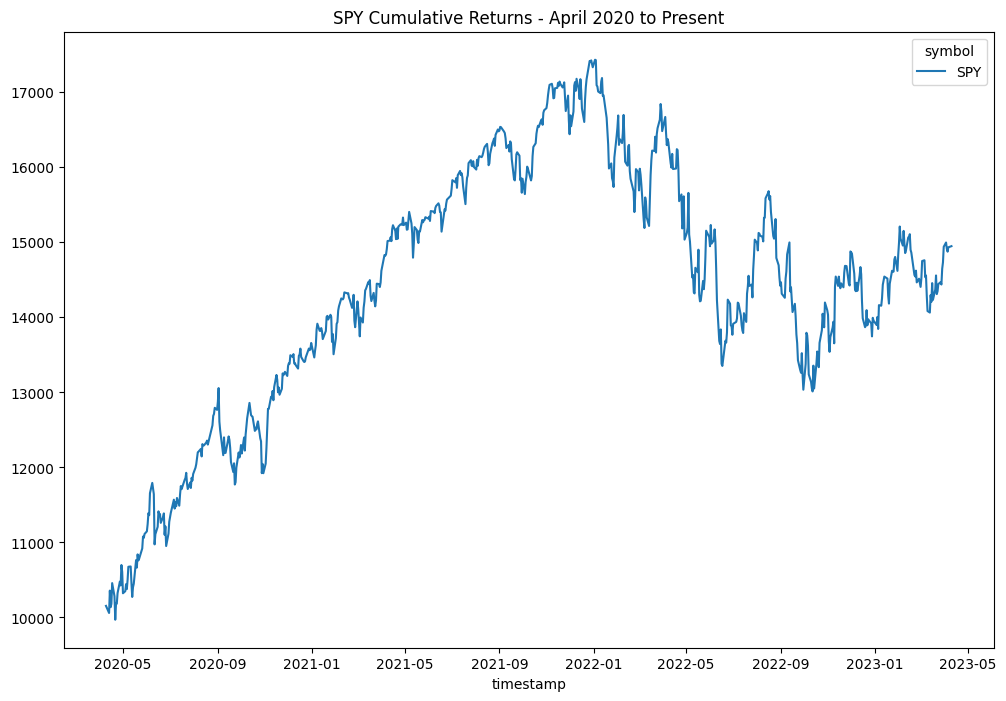

In [55]:
# Plot performance and save to Images
spy_profit.plot(figsize=(12,8), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [56]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit

symbol               GLD
timestamp               
2020-04-09  10254.122211
2020-04-13  10437.116069
2020-04-14  10517.943744
2020-04-15  10475.266731
2020-04-16  10456.514711
...                  ...
2023-04-03  11932.751374
2023-04-04  12155.189137
2023-04-05  12145.489816
2023-04-06  12058.842548
2023-04-10  11969.608794

[755 rows x 1 columns]

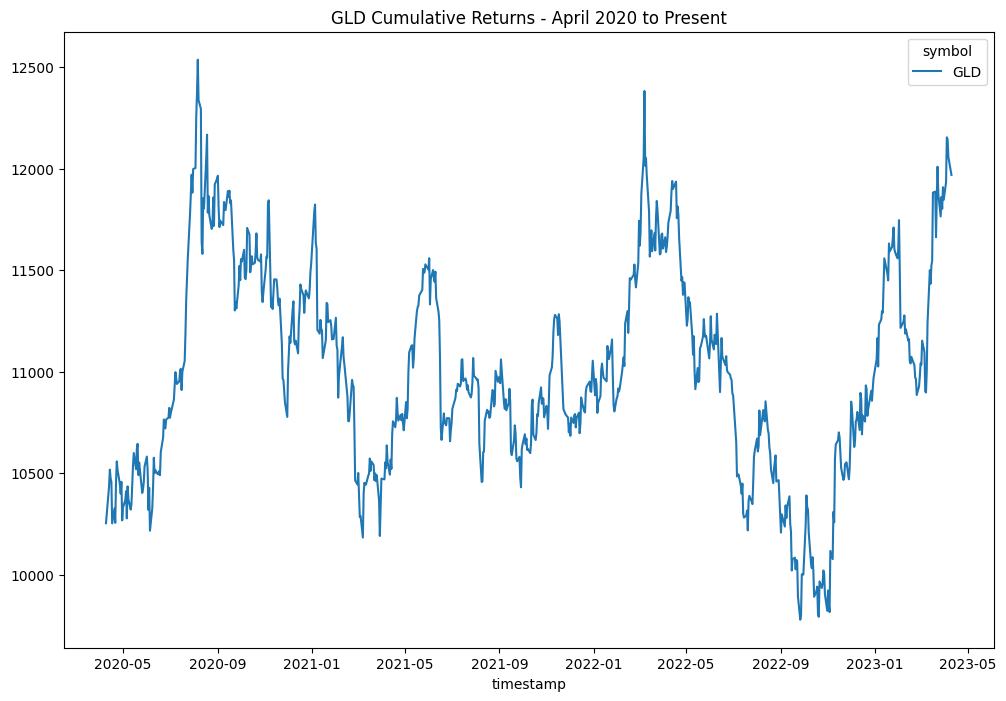

In [57]:
# Plot performance and save to Images
gld_profit.plot(figsize=(12,8), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [58]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit

symbol               TLT
timestamp               
2020-04-09  10018.171906
2020-04-13   9926.706645
2020-04-14   9924.283724
2020-04-15  10187.170634
2020-04-16  10302.865104
...                  ...
2023-04-03   6457.084015
2023-04-04   6489.187716
2023-04-05   6557.029499
2023-04-06   6573.989945
2023-04-10   6467.987159

[755 rows x 1 columns]

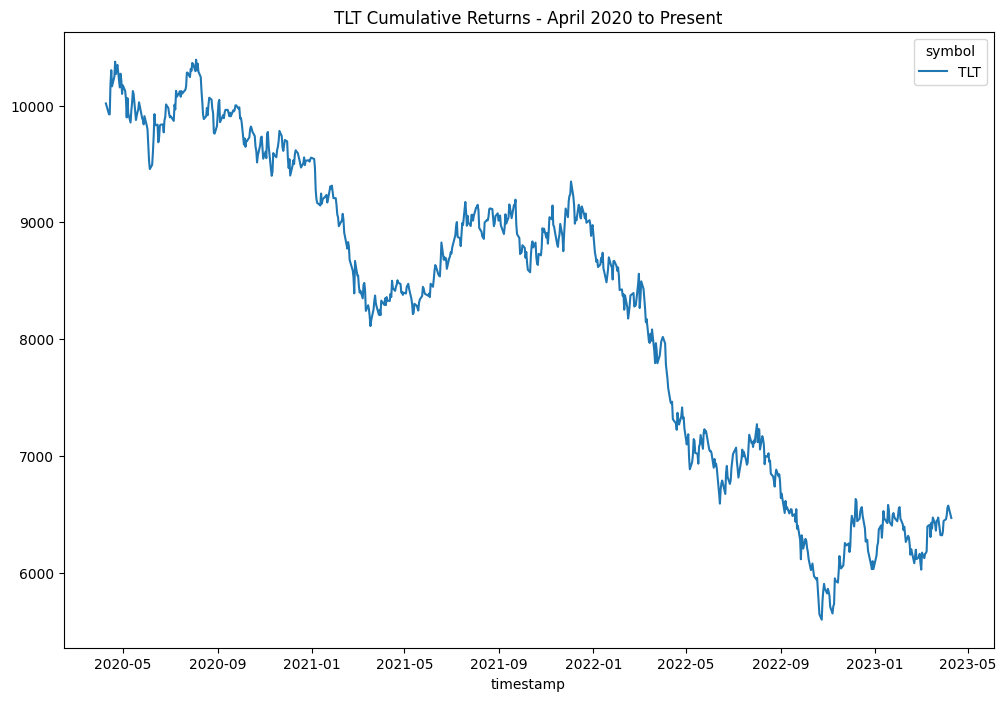

In [59]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(12,8), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [60]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=88)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

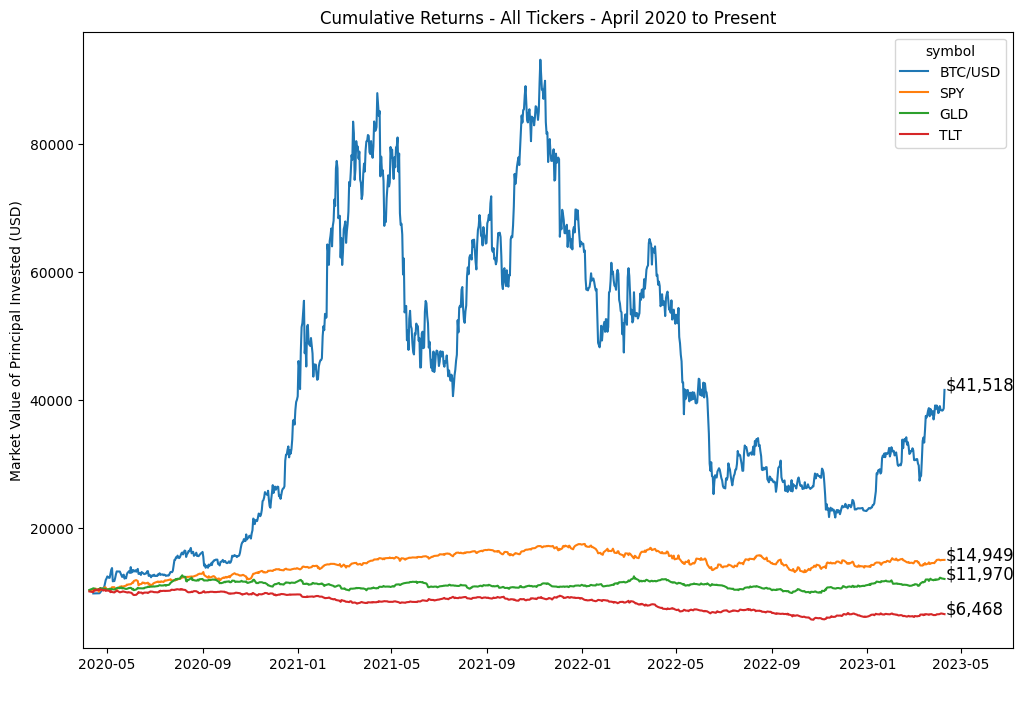

In [61]:
# Overlay of cumulative performances, $10k original investment
ax = btc_profit.plot(figsize=(12,8), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

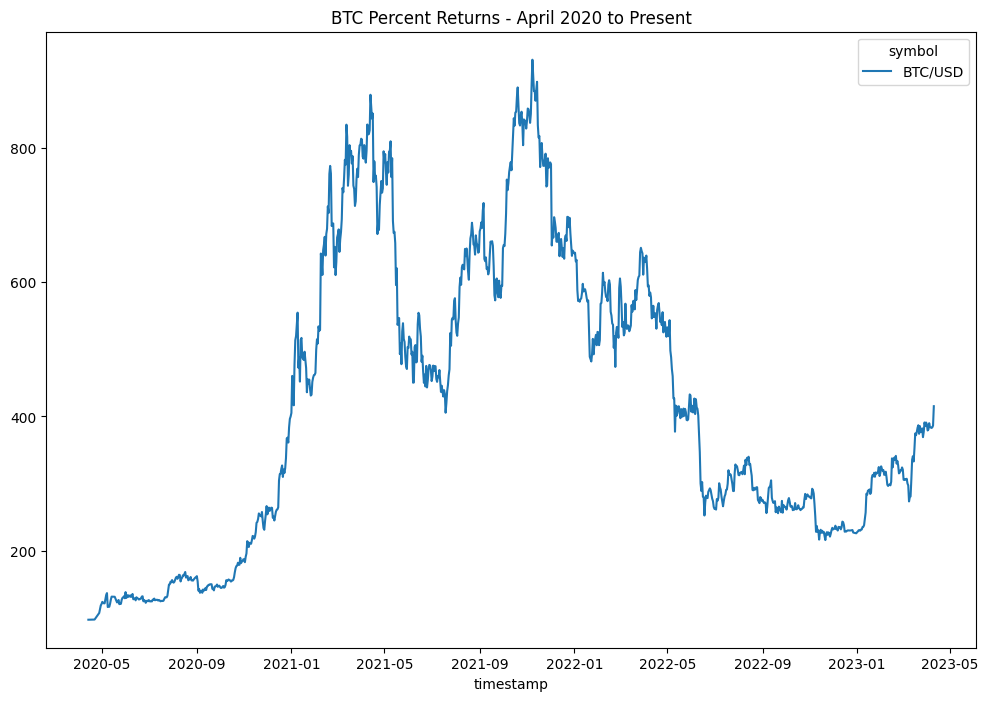

In [62]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(12,8), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

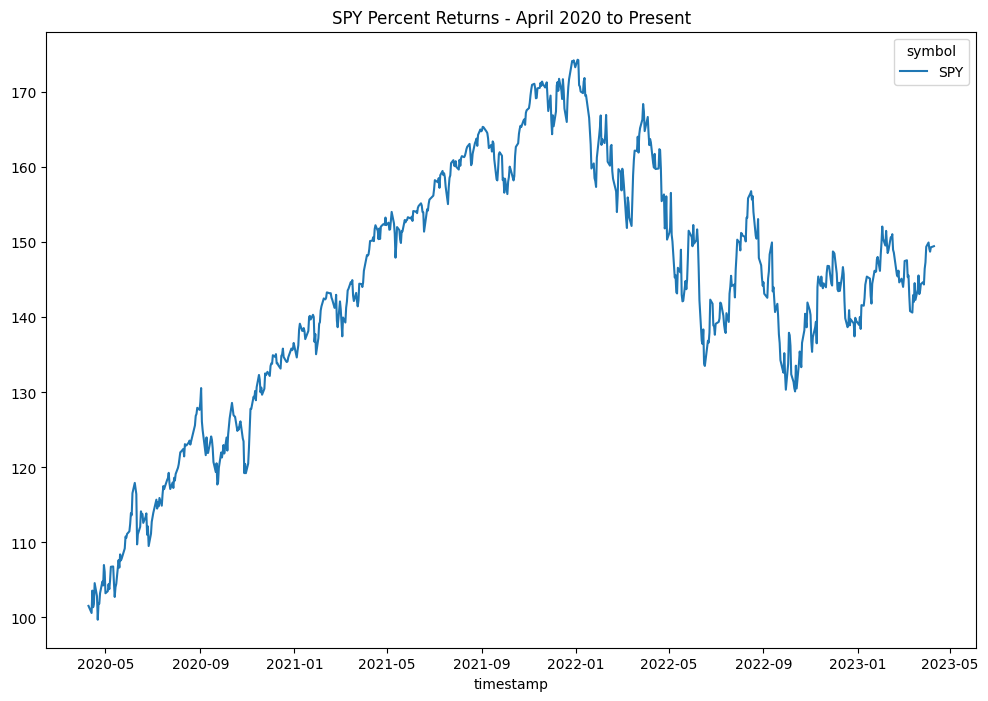

In [63]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(12,8), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

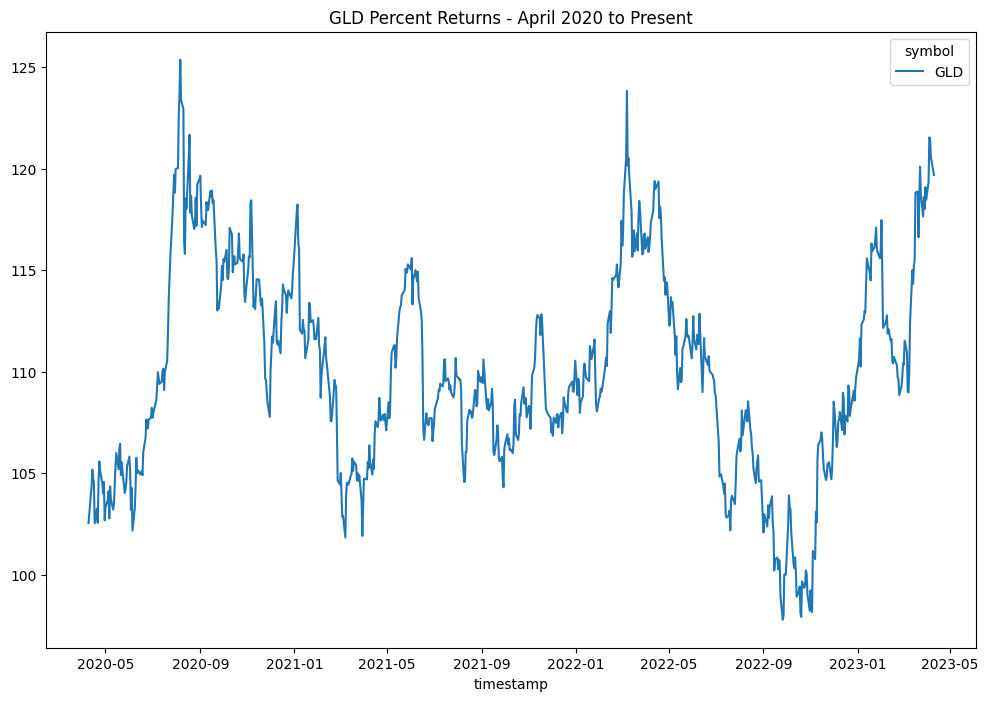

In [64]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(12,8), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

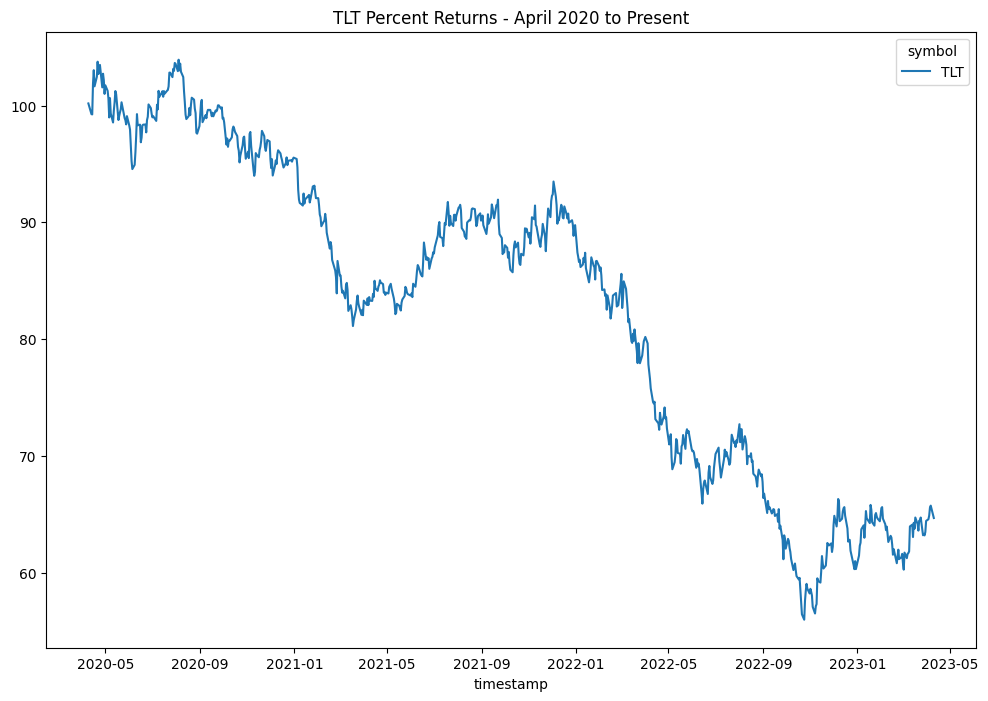

In [65]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(12,8), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [66]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=70)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

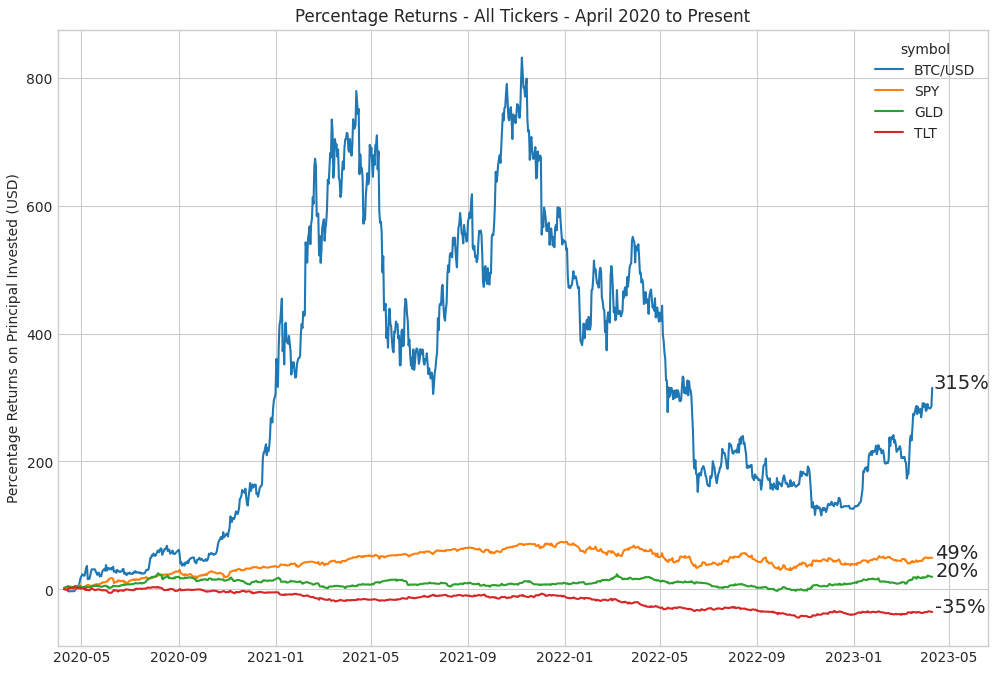

In [67]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(12,8), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [68]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1068 non-null   object 
 1   timestamp    1068 non-null   object 
 2   open         1068 non-null   float64
 3   high         1068 non-null   float64
 4   low          1068 non-null   float64
 5   close        1068 non-null   float64
 6   volume       1068 non-null   float64
 7   trade_count  1068 non-null   float64
 8   vwap         1068 non-null   float64
dtypes: float64(7), object(2)
memory usage: 75.2+ KB


In [69]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1068 non-null   object        
 1   timestamp    1068 non-null   datetime64[ns]
 2   open         1068 non-null   float64       
 3   high         1068 non-null   float64       
 4   low          1068 non-null   float64       
 5   close        1068 non-null   float64       
 6   volume       1068 non-null   float64       
 7   trade_count  1068 non-null   float64       
 8   vwap         1068 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 75.2+ KB


In [70]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly

symbol  timestamp      open      high       low     close       volume  \
5     BTC/USD 2020-05-01   8826.50   8834.00   8716.00   8816.50     0.300700   
29    BTC/USD 2020-06-01   9568.50  10393.00   9515.00  10106.50     5.950700   
59    BTC/USD 2020-07-01   9129.50   9270.00   9129.50   9240.50     5.467900   
90    BTC/USD 2020-08-01  11619.50  12035.00  10594.50  11221.50     0.667400   
116   BTC/USD 2020-09-01  11805.50  12005.50  11805.50  11847.50     0.404900   
146   BTC/USD 2020-10-01  10821.00  10913.00  10477.00  10654.50     5.505900   
177   BTC/USD 2020-11-01  13721.00  13842.50  13688.00  13688.00     1.499100   
207   BTC/USD 2020-12-01  19469.50  19916.00  18222.00  18586.50    32.057500   
238   BTC/USD 2021-01-01  29225.00  29631.00  28750.00  29631.00    25.076500   
269   BTC/USD 2021-02-01  33787.00  34697.00  33145.00  33992.00   815.611700   
297   BTC/USD 2021-03-01  46241.00  50224.00  45863.00  48749.00   266.388900   
328   BTC/USD 2021-04-01  58934.00  60140.00  57957.00  59512.00   220.013800   
358   BTC/USD 2021-05-01  58017.00  58449.00  56253.00  56962.00   451.689800   
389   BTC/USD 2021-06-01  36740.00  37444.00  35536.00  36702.00   854.100000   
419   BTC/USD 2021-07-01  34302.00  34486.00  32724.00  33103.00   631.628100   
450   BTC/USD 2021-08-01  42117.00  42156.00  39265.00  39704.00   674.739700   
481   BTC/USD 2021-09-01  47128.00  49910.00  47124.00  49420.00   970.770000   
511   BTC/USD 2021-10-01  43640.00  48497.00  43573.00  47591.00  1875.942400   
542   BTC/USD 2021-11-01  60587.00  62483.00  60333.00  61474.00   967.860600   
572   BTC/USD 2021-12-01  56846.00  59093.00  55706.00  56927.00  1545.792900   
603   BTC/USD 2022-01-01  47218.00  47933.00  46733.00  47033.00   654.701300   
634   BTC/USD 2022-02-01  38461.00  39310.00  38016.00  38418.00  1911.873400   
662   BTC/USD 2022-03-01  43200.00  44962.00  42876.00  44286.00  2200.385900   
693   BTC/USD 2022-04-01  44720.00  47197.00  44599.00  46559.00  1507.913300   
723   BTC/USD 2022-05-01  37948.00  39112.00  37686.00  38961.00  1014.529700   
754   BTC/USD 2022-06-01  31548.00  31866.00  29316.00  29773.00  2564.134600   
784   BTC/USD 2022-07-01  19381.00  19772.00  18953.00  19176.00  1643.679200   
815   BTC/USD 2022-08-01  23396.00  23514.00  22763.00  22871.00  2027.675400   
846   BTC/USD 2022-09-01  20049.00  20285.00  19555.00  20160.00  2396.350400   
876   BTC/USD 2022-10-01  19410.00  19415.00  19159.00  19331.00   738.110700   
907   BTC/USD 2022-11-01  20499.00  20685.00  20329.00  20516.00  1742.774800   
937   BTC/USD 2022-12-01  17112.80  17312.76  16858.78  16936.52  5872.049400   
968   BTC/USD 2023-01-01  16525.00  16695.31  16495.06  16642.78  1651.545517   
999   BTC/USD 2023-02-01  23116.63  24250.00  22799.97  23815.12  8178.120647   
1027  BTC/USD 2023-03-01  23694.00  23994.59  23307.21  23452.86  5904.993617   
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03  3835.215540   

      trade_count          vwap  
5             4.0   8830.673595  
29           34.0   9979.759012  
59           59.0   9230.826688  
90           24.0  11656.094171  
116           9.0  11947.180168  
146          50.0  10671.754182  
177          18.0  13756.809853  
207         404.0  19078.142224  
238         211.0  29330.826766  
269        2005.0  33830.680191  
297         765.0  48963.892590  
328         826.0  59119.535396  
358        1724.0  57561.257429  
389        3404.0  36368.753256  
419        3809.0  33356.456415  
450        3861.0  40530.554311  
481        6375.0  48282.504172  
511        5484.0  46913.331288  
542        3887.0  61385.191915  
572        7001.0  57063.133038  
603        3435.0  47287.231933  
634        6839.0  38693.044707  
662        8469.0  44056.197044  
693        5901.0  45919.160566  
723        5273.0  38420.719949  
754        9453.0  30252.373008  
784        7718.0  19372.984712  
815       12894.0  23165.159684  
846       18060.0  1992

In [71]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset

timestamp     close
5    2020-05-01   8816.50
29   2020-06-01  10106.50
59   2020-07-01   9240.50
90   2020-08-01  11221.50
116  2020-09-01  11847.50
146  2020-10-01  10654.50
177  2020-11-01  13688.00
207  2020-12-01  18586.50
238  2021-01-01  29631.00
269  2021-02-01  33992.00
297  2021-03-01  48749.00
328  2021-04-01  59512.00
358  2021-05-01  56962.00
389  2021-06-01  36702.00
419  2021-07-01  33103.00
450  2021-08-01  39704.00
481  2021-09-01  49420.00
511  2021-10-01  47591.00
542  2021-11-01  61474.00
572  2021-12-01  56927.00
603  2022-01-01  47033.00
634  2022-02-01  38418.00
662  2022-03-01  44286.00
693  2022-04-01  46559.00
723  2022-05-01  38961.00
754  2022-06-01  29773.00
784  2022-07-01  19176.00
815  2022-08-01  22871.00
846  2022-09-01  20160.00
876  2022-10-01  19331.00
907  2022-11-01  20516.00
937  2022-12-01  16936.52
968  2023-01-01  16642.78
999  2023-02-01  23815.12
1027 2023-03-01  23452.86
1058 2023-04-01  28404.03

In [72]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset

timestamp     close
0  2020-05-01   8816.50
1  2020-06-01  10106.50
2  2020-07-01   9240.50
3  2020-08-01  11221.50
4  2020-09-01  11847.50
5  2020-10-01  10654.50
6  2020-11-01  13688.00
7  2020-12-01  18586.50
8  2021-01-01  29631.00
9  2021-02-01  33992.00
10 2021-03-01  48749.00
11 2021-04-01  59512.00
12 2021-05-01  56962.00
13 2021-06-01  36702.00
14 2021-07-01  33103.00
15 2021-08-01  39704.00
16 2021-09-01  49420.00
17 2021-10-01  47591.00
18 2021-11-01  61474.00
19 2021-12-01  56927.00
20 2022-01-01  47033.00
21 2022-02-01  38418.00
22 2022-03-01  44286.00
23 2022-04-01  46559.00
24 2022-05-01  38961.00
25 2022-06-01  29773.00
26 2022-07-01  19176.00
27 2022-08-01  22871.00
28 2022-09-01  20160.00
29 2022-10-01  19331.00
30 2022-11-01  20516.00
31 2022-12-01  16936.52
32 2023-01-01  16642.78
33 2023-02-01  23815.12
34 2023-03-01  23452.86
35 2023-04-01  28404.03

In [73]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index

close
timestamp           
2020-05-01   8816.50
2020-06-01  10106.50
2020-07-01   9240.50
2020-08-01  11221.50
2020-09-01  11847.50
2020-10-01  10654.50
2020-11-01  13688.00
2020-12-01  18586.50
2021-01-01  29631.00
2021-02-01  33992.00
2021-03-01  48749.00
2021-04-01  59512.00
2021-05-01  56962.00
2021-06-01  36702.00
2021-07-01  33103.00
2021-08-01  39704.00
2021-09-01  49420.00
2021-10-01  47591.00
2021-11-01  61474.00
2021-12-01  56927.00
2022-01-01  47033.00
2022-02-01  38418.00
2022-03-01  44286.00
2022-04-01  46559.00
2022-05-01  38961.00
2022-06-01  29773.00
2022-07-01  19176.00
2022-08-01  22871.00
2022-09-01  20160.00
2022-10-01  19331.00
2022-11-01  20516.00
2022-12-01  16936.52
2023-01-01  16642.78
2023-02-01  23815.12
2023-03-01  23452.86
2023-04-01  28404.03

In [74]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211
2023-04-01  0.211112

In [75]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [76]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


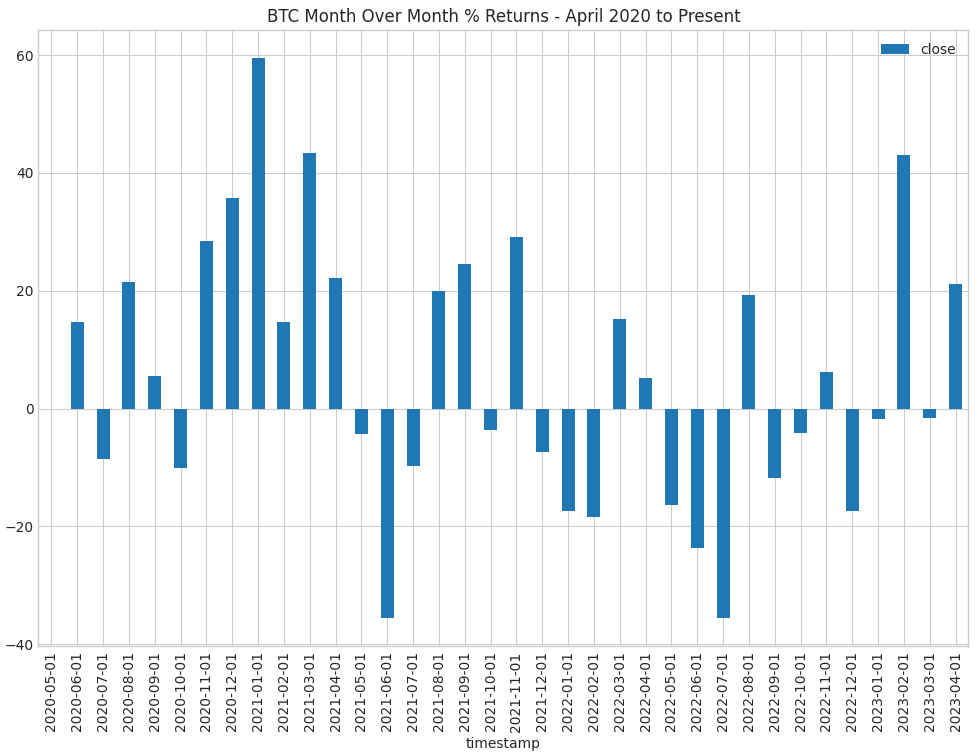

In [77]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [78]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2268 non-null   object 
 1   timestamp    2268 non-null   object 
 2   open         2268 non-null   float64
 3   high         2268 non-null   float64
 4   low          2268 non-null   float64
 5   close        2268 non-null   float64
 6   volume       2268 non-null   float64
 7   trade_count  2268 non-null   float64
 8   vwap         2268 non-null   float64
dtypes: float64(7), object(2)
memory usage: 159.6+ KB


In [79]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2268 non-null   object        
 1   timestamp    2268 non-null   datetime64[ns]
 2   open         2268 non-null   float64       
 3   high         2268 non-null   float64       
 4   low          2268 non-null   float64       
 5   close        2268 non-null   float64       
 6   volume       2268 non-null   float64       
 7   trade_count  2268 non-null   float64       
 8   vwap         2268 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 159.6+ KB


In [80]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2263    TLT 2023-04-03  105.88  107.0950  105.7000  106.60  18237429.0   
2264    TLT 2023-04-04  105.78  107.8000  105.7500  107.13  18052734.0   
2265    TLT 2023-04-05  107.77  108.3700  107.4100  108.25  23069677.0   
2266    TLT 2023-04-06  108.42  108.8700  108.3900  108.53  16447295.0   
2267    TLT 2023-04-10  107.64  107.7618  106.5600  106.78  19869749.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2263     111192.0  106.534448  
2264     110253.0  107.222297  
2265     141394.0  108.108906  
2266      92370.0  108.599296  
2267     103772.0  106.943490  

[2268 rows x 9 columns]

In [81]:
stock_index = stock_df.set_index('timestamp')
stock_index

symbol    open      high       low   close      volume  \
timestamp                                                           
2020-04-08    GLD  155.91  155.9400  154.5900  154.65   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.58  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.41  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.66  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.00  12141890.0   
...           ...     ...       ...       ...     ...         ...   
2023-04-03    TLT  105.88  107.0950  105.7000  106.60  18237429.0   
2023-04-04    TLT  105.78  107.8000  105.7500  107.13  18052734.0   
2023-04-05    TLT  107.77  108.3700  107.4100  108.25  23069677.0   
2023-04-06    TLT  108.42  108.8700  108.3900  108.53  16447295.0   
2023-04-10    TLT  107.64  107.7618  106.5600  106.78  19869749.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-04-03     111192.0  106.534448  
2023-04-04     110253.0  107.222297  
2023-04-05     141394.0  108.108906  
2023-04-06      92370.0  108.599296  
2023-04-10     103772.0  106.943490  

[2268 rows x 8 columns]

In [82]:
stock_index['2021-06-30':'2021-07-02']

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2021-06-30    GLD  164.57  166.100  164.2900  165.63   7954916.0      55215.0   
2021-07-01    GLD  166.65  166.880  165.5000  166.20   7427387.0      50788.0   
2021-07-02    GLD  167.35  167.715  166.4000  167.29   7872766.0      52311.0   
2021-06-30    SPY  427.21  428.780  427.1800  428.06  64702769.0     315392.0   
2021-07-01    SPY  428.87  430.600  428.8000  430.43  52968992.0     315119.0   
2021-07-02    SPY  431.67  434.100  430.5218  433.72  57503965.0     312260.0   
2021-06-30    TLT  144.25  144.930  144.0700  144.35  15707427.0      76777.0   
2021-07-01    TLT  143.98  144.310  143.5300  144.17  10767196.0      55429.0   
2021-07-02    TLT  144.23  145.040  144.1100  145.04   9648629.0      52006.0   

                  vwap  
timestamp               
2021-06-30  165.379047  
2021-07-01  166.141960  
2021-07-02  167.181069  
2021-06-30  428.035998  
2021-07-01  429.721484  
2021-07-02  432.842859  
2021-06-30  144.486788  
2021-07-01  143.845345  
2021-07-02  144.737576

In [83]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df

symbol      open      high       low   close      volume  \
timestamp                                                             
2020-04-01    GLD  155.9100  155.9400  154.5900  154.65   7600804.0   
2020-05-01    GLD  157.9500  160.4500  157.8000  159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900  163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400  166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000  185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300  185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375  178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301  177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000  170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550  182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600  174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600  161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800  161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100  167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900  177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000  166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000  169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600  169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850  164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100  167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600  166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000  168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700  168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300  181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800  179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850  173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900  172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600  168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100  165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200  157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300  158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700  153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750  167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200  171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300  181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700  170.76   6590684.0   
2023-04-03    GLD  183.8500  185.0350  183.3200  184.54   9206828.0   

            trade_count        vwap  
timestamp                            
2020-04-01      60704.0  155.233884  
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  

In [84]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc

symbol      open      high       low   close      volume  \
timestamp                                                             
2020-05-01    GLD  157.9500  160.4500  157.8000  159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900  163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400  166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000  185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300  185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375  178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301  177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000  170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550  182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600  174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600  161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800  161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100  167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900  177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000  166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000  169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600  169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850  164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100  167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600  166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000  168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700  168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300  181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800  179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850  173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900  172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600  168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100  165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200  157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300  158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700  153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750  167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200  171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300  181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700  170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59916.0  167.471026  
2023-01-02      55916.0  171.070617  
2023-02-01      57305.0  180.319224  
2023-03-01     

In [85]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df

symbol     open      high       low   close       volume  \
timestamp                                                             
2020-04-01    SPY  267.960  276.0000  265.2542  274.00  153774487.0   
2020-05-01    SPY  285.310  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.620  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.540  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.320  329.6200  327.7300  328.67   53078112.0   
2020-09-01    SPY  350.210  352.7100  349.2400  352.68   54999325.0   
2020-10-01    SPY  337.690  338.7400  335.0100  336.97   88698745.0   
2020-11-02    SPY  330.200  332.3600  327.2400  330.19   86068377.0   
2020-12-01    SPY  365.570  367.6800  364.9300  365.84   74504970.0   
2021-01-01    SPY  375.310  375.4500  364.8200  368.97  110210840.0   
2021-02-01    SPY  373.720  377.3400  370.3760  376.02   75817597.0   
2021-03-01    SPY  385.590  390.9200  380.5720  389.43  105348798.0   
2021-04-01    SPY  398.400  400.6700  398.1800  400.61   99125509.0   
2021-05-03    SPY  419.430  419.8400  417.6650  418.20   67670957.0   
2021-06-01    SPY  422.570  422.7200  419.2000  419.67   54216625.0   
2021-07-01    SPY  428.870  430.6000  428.8000  430.43   52968992.0   
2021-08-02    SPY  440.340  440.9300  437.2100  437.59   58330752.0   
2021-09-01    SPY  452.560  453.1100  451.5450  451.80   48436745.0   
2021-10-01    SPY  430.980  436.0329  427.2400  434.24  128881427.0   
2021-11-01    SPY  460.300  460.7021  458.2000  460.04   47634255.0   
2021-12-01    SPY  461.640  464.6700  450.2900  450.50  131947695.0   
2022-01-03    SPY  476.300  477.8500  473.8500  477.71   72604064.0   
2022-02-01    SPY  450.680  453.6300  446.9384  452.95  122606343.0   
2022-03-01    SPY  435.040  437.1700  427.2100  429.98  132591866.0   
2022-04-01    SPY  453.310  453.4600  449.1400  452.92   88675787.0   
2022-05-02    SPY  412.070  415.9200  405.0200  414.48  157215637.0   
2022-06-01    SPY  415.170  416.2400  406.9300  409.59   85820291.0   
2022-07-01    SPY  376.560  381.7000  373.8000  381.24   74084447.0   
2022-08-01    SPY  409.150  413.4100  408.4000  410.77   69633616.0   
2022-09-01    SPY  392.890  396.7800  390.0400  396.42   78315802.0   
2022-10-03    SPY  361.080  368.5500  359.2100  366.61   89052594.0   
2022-11-01    SPY  390.140  390.3900  383.2900  384.52   83777606.0   
2022-12-01    SPY  408.770  410.0000  404.7500  407.38   76270288.0   
2023-01-02    SPY  384.370  386.4300  377.8310  380.82   74330774.0   
2023-02-01    SPY  405.211  413.6700  402.3500  410.80  101480517.0   
2023-03-01    SPY  395.410  396.6900  393.3800  394.74   99723518.0   
2023-04-03    SPY  408.850  411.3700  408.4400  410.95   67426048.0   

            trade_count        vwap  
timestamp                            
2020-04-01     950859.0  271.051454  
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795  
2020-09-01     295183.0  351.086724  
2020-10-01     442959.0  336.463100  
2020-11-02     582406.0  329.604551  
2020-12-01     378050.0  365.968334  
2021-01-01     623063.0  369.337439  
2021-02-01     414900.0  374.490318  
2021-03-01     570891.0  388.233476  
2021-04-01     386551.0  398.273349  
2021-05-03     380266.0  418.287830  
2021-06-01     379476.0  420.229588  
2021-07-01     315119.0  429.721484  
2021-08-02     406413.0  438.944582  
2021-09-01     333101.0  452.294976  
2021-10-01     849857.0  431.732261  
2021-11-01     401292.0  459.463015  
2021-12-01    1034713.0  457.411297  
2022-01-03     534803.0  476.526964  
2022-02-01    1091104.0  450.710894  
2022-03-01    1350983.0  431.682495  
2022-04-01     624742.0  451.850852  
2022-05-02    1456038.0  411.158042  
2022-06-01     691614.0  410.785032  
2022-07-01     600889.0  378.221933  
2022-08-01     516221.0  411.079113  
2022-09-01     594723.0  393.055687  
2022-10-03     617784.0  

In [86]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc

symbol     open      high       low   close       volume  \
timestamp                                                             
2020-05-01    SPY  285.310  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.620  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.540  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.320  329.6200  327.7300  328.67   53078112.0   
2020-09-01    SPY  350.210  352.7100  349.2400  352.68   54999325.0   
2020-10-01    SPY  337.690  338.7400  335.0100  336.97   88698745.0   
2020-11-02    SPY  330.200  332.3600  327.2400  330.19   86068377.0   
2020-12-01    SPY  365.570  367.6800  364.9300  365.84   74504970.0   
2021-01-01    SPY  375.310  375.4500  364.8200  368.97  110210840.0   
2021-02-01    SPY  373.720  377.3400  370.3760  376.02   75817597.0   
2021-03-01    SPY  385.590  390.9200  380.5720  389.43  105348798.0   
2021-04-01    SPY  398.400  400.6700  398.1800  400.61   99125509.0   
2021-05-03    SPY  419.430  419.8400  417.6650  418.20   67670957.0   
2021-06-01    SPY  422.570  422.7200  419.2000  419.67   54216625.0   
2021-07-01    SPY  428.870  430.6000  428.8000  430.43   52968992.0   
2021-08-02    SPY  440.340  440.9300  437.2100  437.59   58330752.0   
2021-09-01    SPY  452.560  453.1100  451.5450  451.80   48436745.0   
2021-10-01    SPY  430.980  436.0329  427.2400  434.24  128881427.0   
2021-11-01    SPY  460.300  460.7021  458.2000  460.04   47634255.0   
2021-12-01    SPY  461.640  464.6700  450.2900  450.50  131947695.0   
2022-01-03    SPY  476.300  477.8500  473.8500  477.71   72604064.0   
2022-02-01    SPY  450.680  453.6300  446.9384  452.95  122606343.0   
2022-03-01    SPY  435.040  437.1700  427.2100  429.98  132591866.0   
2022-04-01    SPY  453.310  453.4600  449.1400  452.92   88675787.0   
2022-05-02    SPY  412.070  415.9200  405.0200  414.48  157215637.0   
2022-06-01    SPY  415.170  416.2400  406.9300  409.59   85820291.0   
2022-07-01    SPY  376.560  381.7000  373.8000  381.24   74084447.0   
2022-08-01    SPY  409.150  413.4100  408.4000  410.77   69633616.0   
2022-09-01    SPY  392.890  396.7800  390.0400  396.42   78315802.0   
2022-10-03    SPY  361.080  368.5500  359.2100  366.61   89052594.0   
2022-11-01    SPY  390.140  390.3900  383.2900  384.52   83777606.0   
2022-12-01    SPY  408.770  410.0000  404.7500  407.38   76270288.0   
2023-01-02    SPY  384.370  386.4300  377.8310  380.82   74330774.0   
2023-02-01    SPY  405.211  413.6700  402.3500  410.80  101480517.0   
2023-03-01    SPY  395.410  396.6900  393.3800  394.74   99723518.0   

            trade_count        vwap  
timestamp                            
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795  
2020-09-01     295183.0  351.086724  
2020-10-01     442959.0  336.463100  
2020-11-02     582406.0  329.604551  
2020-12-01     378050.0  365.968334  
2021-01-01     623063.0  369.337439  
2021-02-01     414900.0  374.490318  
2021-03-01     570891.0  388.233476  
2021-04-01     386551.0  398.273349  
2021-05-03     380266.0  418.287830  
2021-06-01     379476.0  420.229588  
2021-07-01     315119.0  429.721484  
2021-08-02     406413.0  438.944582  
2021-09-01     333101.0  452.294976  
2021-10-01     849857.0  431.732261  
2021-11-01     401292.0  459.463015  
2021-12-01    1034713.0  457.411297  
2022-01-03     534803.0  476.526964  
2022-02-01    1091104.0  450.710894  
2022-03-01    1350983.0  431.682495  
2022-04-01     624742.0  451.850852  
2022-05-02    1456038.0  411.158042  
2022-06-01     691614.0  410.785032  
2022-07-01     600889.0  378.221933  
2022-08-01     516221.0  411.079113  
2022-09-01     594723.0  393.055687  
2022-10-03     617784.0  364.702960  
2022-11-01     541297.0  385.596075  
2022-12-01     599125.0  407.368696  
2023-01-02     585048.0  380.961150  
2023-02-01     833884.0  407.864239  
2023-03-01     

In [87]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df

symbol     open      high      low   close      volume  \
timestamp                                                           
2020-04-01    TLT  165.110  166.1900  164.130  165.09  10147077.0   
2020-05-01    TLT  167.500  168.1100  166.440  167.95  10209421.0   
2020-06-01    TLT  162.100  162.4400  161.670  162.28  13353301.0   
2020-07-01    TLT  162.810  163.5600  162.150  163.42  13181262.0   
2020-08-03    TLT  169.240  169.9900  168.970  169.95   9067756.0   
2020-09-01    TLT  161.760  164.0700  161.180  163.86  10587634.0   
2020-10-01    TLT  162.510  163.7401  162.100  163.36  11523874.0   
2020-11-02    TLT  158.700  159.1900  158.330  158.58  10810494.0   
2020-12-01    TLT  158.550  158.7400  156.680  157.50  13666212.0   
2021-01-01    TLT  156.670  158.1800  156.535  157.54  13152865.0   
2021-02-01    TLT  151.660  152.3600  151.490  152.00   8165534.0   
2021-03-01    TLT  140.660  141.4100  140.090  141.06  22050428.0   
2021-04-01    TLT  136.550  137.6200  136.300  137.51  14880298.0   
2021-05-03    TLT  138.700  139.6450  138.280  138.52  16434305.0   
2021-06-01    TLT  137.820  138.2600  137.250  138.21  11777166.0   
2021-07-01    TLT  143.980  144.3100  143.530  144.17  10767196.0   
2021-08-02    TLT  149.460  151.2300  149.180  150.67  21220997.0   
2021-09-01    TLT  149.270  149.3900  148.490  148.89  10798246.0   
2021-10-01    TLT  144.850  145.4000  144.200  145.35  26138957.0   
2021-11-01    TLT  145.800  146.7600  145.700  146.44  18013164.0   
2021-12-01    TLT  150.485  152.4100  149.790  152.34  30824943.0   
2022-01-03    TLT  146.410  146.9400  144.280  144.30  33857678.0   
2022-02-01    TLT  142.280  142.3600  141.055  141.72  20789664.0   
2022-03-01    TLT  140.360  142.3300  140.000  141.30  35286889.0   
2022-04-01    TLT  130.010  132.9600  129.710  132.38  23480857.0   
2022-05-02    TLT  117.860  118.2700  116.930  117.18  29035772.0   
2022-06-01    TLT  117.030  117.3400  115.690  116.22  15514796.0   
2022-07-01    TLT  115.900  117.5900  115.220  115.82  21856202.0   
2022-08-01    TLT  118.250  120.1000  118.080  120.04  17972699.0   
2022-09-01    TLT  109.870  110.2500  108.940  109.60  22490448.0   
2022-10-03    TLT  103.850  104.6800  103.150  103.83  27892138.0   
2022-11-01    TLT   97.380   97.4200   96.210   96.77  17585088.0   
2022-12-01    TLT  103.150  105.8100  103.100  105.76  53156786.0   
2023-01-02    TLT  102.200  102.3400  100.840  101.46  25312171.0   
2023-02-01    TLT  107.550  108.5900  106.420  108.18  25310455.0   
2023-03-01    TLT  100.820  101.0300   99.960  100.37  19004200.0   
2023-04-03    TLT  105.880  107.0950  105.700  106.60  18237429.0   

            trade_count        vwap  
timestamp                            
2020-04-01      63686.0  165.217491  
2020-05-01      52918.0  167.362331  
2020-06-01      54793.0  162.363115  
2020-07-01      66576.0  163.014043  
2020-08-03      61181.0  169.514329  
2020-09-01      58232.0  163.138871  
2020-10-01      62953.0  163.194508  
2020-11-02      57471.0  158.700148  
2020-12-01      73359.0  157.524279  
2021-01-01      66776.0  157.536581  
2021-02-01      41773.0  151.926223  
2021-03-01     131299.0  140.676610  
2021-04-01      66587.0  137.128607  
2021-05-03      84727.0  138.785396  
2021-06-01      61981.0  137.875244  
2021-07-01      55429.0  143.845345  
2021-08-02      93872.0  150.455494  
2021-09-01      62840.0  148.892889  
2021-10-01     120052.0  144.946760  
2021-11-01     102768.0  146.233070  
2021-12-01     159674.0  151.363718  
2022-01-03     132357.0  145.398962  
2022-02-01      97271.0  141.680747  
2022-03-01     227202.0  141.322926  
2022-04-01     149421.0  131.842770  
2022-05-02     165127.0  117.383631  
2022-06-01      89438.0  116.259375  
2022-07-01     138117.0  116.113939  
2022-08-01     106497.0  119.478759  
2022-09-01     131508.0  109.661551  
2022-10-03     138135.0  103.804973  
2022-11-01     117591.0   96.698772  
2022-12-01     215289.0  10

In [88]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc

symbol     open      high      low   close      volume  \
timestamp                                                           
2020-05-01    TLT  167.500  168.1100  166.440  167.95  10209421.0   
2020-06-01    TLT  162.100  162.4400  161.670  162.28  13353301.0   
2020-07-01    TLT  162.810  163.5600  162.150  163.42  13181262.0   
2020-08-03    TLT  169.240  169.9900  168.970  169.95   9067756.0   
2020-09-01    TLT  161.760  164.0700  161.180  163.86  10587634.0   
2020-10-01    TLT  162.510  163.7401  162.100  163.36  11523874.0   
2020-11-02    TLT  158.700  159.1900  158.330  158.58  10810494.0   
2020-12-01    TLT  158.550  158.7400  156.680  157.50  13666212.0   
2021-01-01    TLT  156.670  158.1800  156.535  157.54  13152865.0   
2021-02-01    TLT  151.660  152.3600  151.490  152.00   8165534.0   
2021-03-01    TLT  140.660  141.4100  140.090  141.06  22050428.0   
2021-04-01    TLT  136.550  137.6200  136.300  137.51  14880298.0   
2021-05-03    TLT  138.700  139.6450  138.280  138.52  16434305.0   
2021-06-01    TLT  137.820  138.2600  137.250  138.21  11777166.0   
2021-07-01    TLT  143.980  144.3100  143.530  144.17  10767196.0   
2021-08-02    TLT  149.460  151.2300  149.180  150.67  21220997.0   
2021-09-01    TLT  149.270  149.3900  148.490  148.89  10798246.0   
2021-10-01    TLT  144.850  145.4000  144.200  145.35  26138957.0   
2021-11-01    TLT  145.800  146.7600  145.700  146.44  18013164.0   
2021-12-01    TLT  150.485  152.4100  149.790  152.34  30824943.0   
2022-01-03    TLT  146.410  146.9400  144.280  144.30  33857678.0   
2022-02-01    TLT  142.280  142.3600  141.055  141.72  20789664.0   
2022-03-01    TLT  140.360  142.3300  140.000  141.30  35286889.0   
2022-04-01    TLT  130.010  132.9600  129.710  132.38  23480857.0   
2022-05-02    TLT  117.860  118.2700  116.930  117.18  29035772.0   
2022-06-01    TLT  117.030  117.3400  115.690  116.22  15514796.0   
2022-07-01    TLT  115.900  117.5900  115.220  115.82  21856202.0   
2022-08-01    TLT  118.250  120.1000  118.080  120.04  17972699.0   
2022-09-01    TLT  109.870  110.2500  108.940  109.60  22490448.0   
2022-10-03    TLT  103.850  104.6800  103.150  103.83  27892138.0   
2022-11-01    TLT   97.380   97.4200   96.210   96.77  17585088.0   
2022-12-01    TLT  103.150  105.8100  103.100  105.76  53156786.0   
2023-01-02    TLT  102.200  102.3400  100.840  101.46  25312171.0   
2023-02-01    TLT  107.550  108.5900  106.420  108.18  25310455.0   
2023-03-01    TLT  100.820  101.0300   99.960  100.37  19004200.0   

            trade_count        vwap  
timestamp                            
2020-05-01      52918.0  167.362331  
2020-06-01      54793.0  162.363115  
2020-07-01      66576.0  163.014043  
2020-08-03      61181.0  169.514329  
2020-09-01      58232.0  163.138871  
2020-10-01      62953.0  163.194508  
2020-11-02      57471.0  158.700148  
2020-12-01      73359.0  157.524279  
2021-01-01      66776.0  157.536581  
2021-02-01      41773.0  151.926223  
2021-03-01     131299.0  140.676610  
2021-04-01      66587.0  137.128607  
2021-05-03      84727.0  138.785396  
2021-06-01      61981.0  137.875244  
2021-07-01      55429.0  143.845345  
2021-08-02      93872.0  150.455494  
2021-09-01      62840.0  148.892889  
2021-10-01     120052.0  144.946760  
2021-11-01     102768.0  146.233070  
2021-12-01     159674.0  151.363718  
2022-01-03     132357.0  145.398962  
2022-02-01      97271.0  141.680747  
2022-03-01     227202.0  141.322926  
2022-04-01     149421.0  131.842770  
2022-05-02     165127.0  117.383631  
2022-06-01      89438.0  116.259375  
2022-07-01     138117.0  116.113939  
2022-08-01     106497.0  119.478759  
2022-09-01     131508.0  109.661551  
2022-10-03     138135.0  103.804973  
2022-11-01     117591.0   96.698772  
2022-12-01     215289.0  104.856665  
2023-01-02     147214.0  101.573675  
2023-02-01     155975.0  107.567886  
2023-03-01     124652.0  100.407281

In [89]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



symbol      open      high       low  gld_close      volume  \
timestamp                                                                
2020-05-01    GLD  157.9500  160.4500  157.8000     159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900     163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400     166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000     185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300     185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375     178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301     177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000     170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550     182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600     174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600     161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800     161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100     167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900     177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000     166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000     169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600     169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850     164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100     167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600     166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000     168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700     168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300     181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800     179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850     173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900     172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600     168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100     165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200     157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300     158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700     153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750     167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200     171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300     181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700     170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59

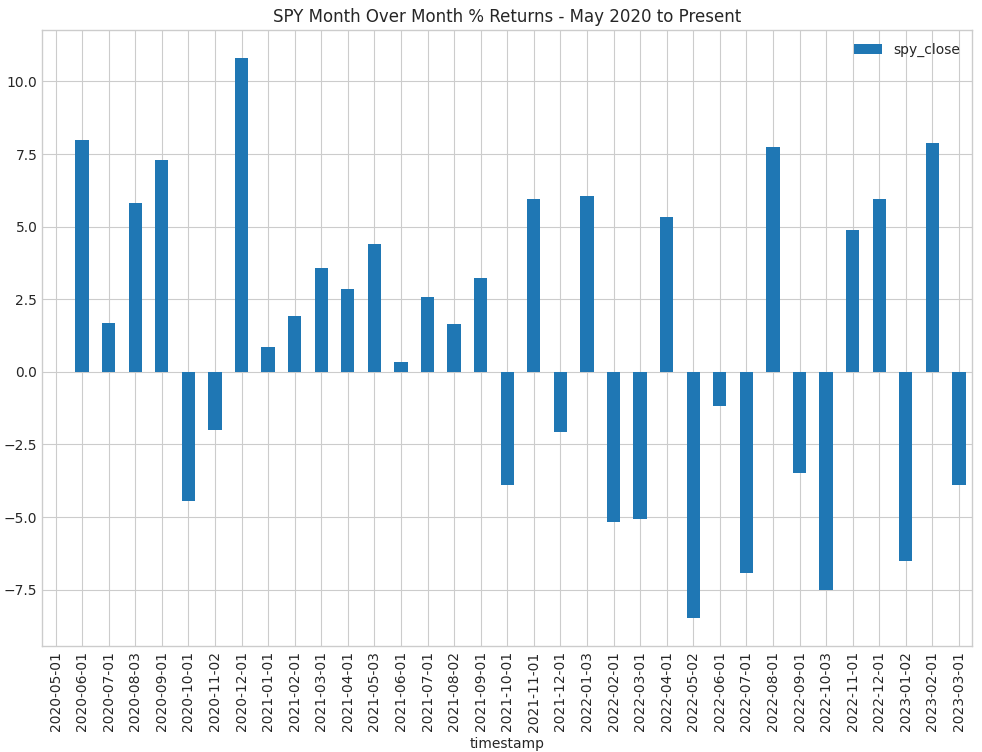

In [90]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

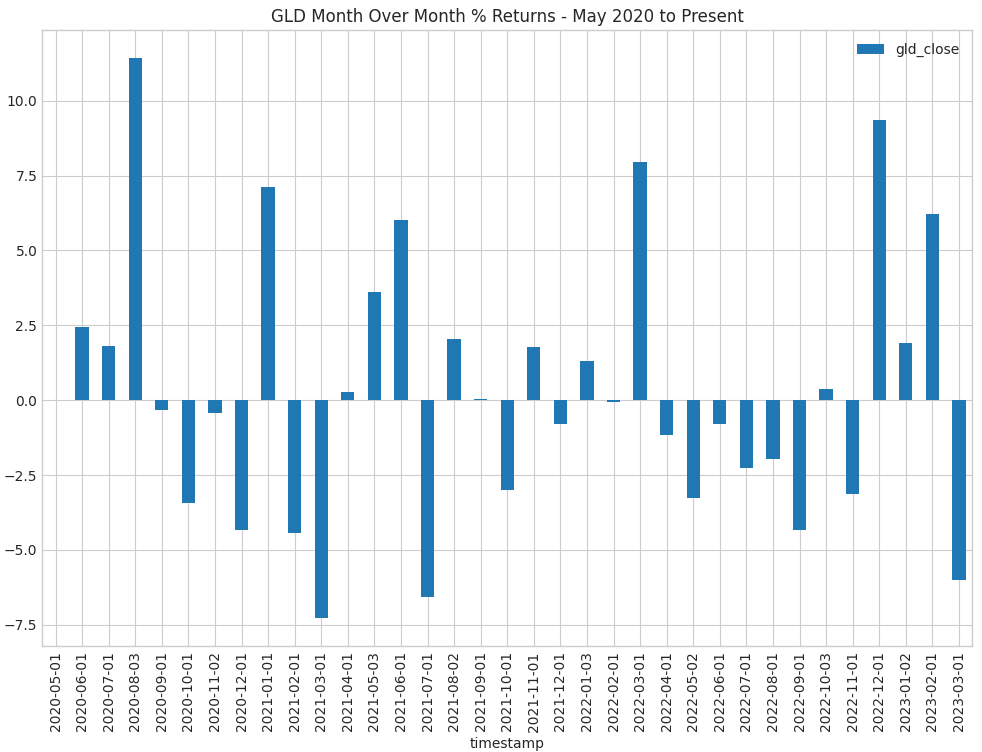

In [91]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

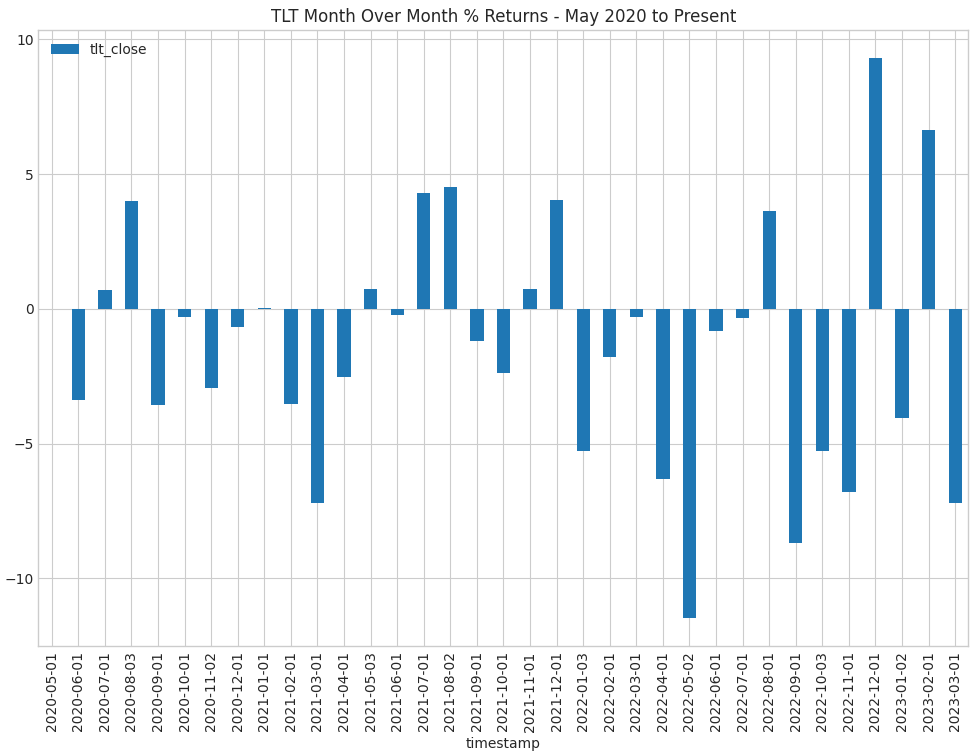

In [92]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [93]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [94]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, 2020-05-01 to 2023-03-01
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
34 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes


In [95]:
spy_pct.shape

(35,)

In [96]:
gld_pct.shape

(35,)

In [97]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

tlt_close  spy_close  gld_close
timestamp                                  
2020-05-01        NaN        NaN        NaN
2020-06-01  -0.033760   0.079977   0.024283
2020-07-01   0.007025   0.016762   0.018086
2020-08-03   0.039958   0.058280   0.114152
2020-09-01  -0.035834   0.073052  -0.003178
2020-10-01  -0.003051  -0.044545  -0.034315
2020-11-02  -0.029261  -0.020120  -0.004421
2020-12-01  -0.006810   0.107968  -0.043393
2021-01-01   0.000254   0.008556   0.071273
2021-02-01  -0.035166   0.019107  -0.044373
2021-03-01  -0.071974   0.035663  -0.072892
2021-04-01  -0.025167   0.028709   0.002786
2021-05-03   0.007345   0.043908   0.035992
2021-06-01  -0.002238   0.003515   0.060128
2021-07-01   0.043123   0.025639  -0.065767
2021-08-02   0.045086   0.016635   0.020517
2021-09-01  -0.011814   0.032473   0.000531
2021-10-01  -0.023776  -0.038867  -0.030112
2021-11-01   0.007499   0.059414   0.017802
2021-12-01   0.040290  -0.020737  -0.008118
2022-01-03  -0.052777   0.060400   0.013060
2022-02-01  -0.017879  -0.051831  -0.000594
2022-03-01  -0.002964  -0.050712   0.079593
2022-04-01  -0.063128   0.053351  -0.011673
2022-05-02  -0.114821  -0.084872  -0.032702
2022-06-01  -0.008193  -0.011798  -0.008063
2022-07-01  -0.003442  -0.069216  -0.022702
2022-08-01   0.036436   0.077458  -0.019546
2022-09-01  -0.086971  -0.034934  -0.043386
2022-10-03  -0.052646  -0.075198   0.003547
2022-11-01  -0.067996   0.048853  -0.031370
2022-12-01   0.092901   0.059451   0.093705
2023-01-02  -0.040658  -0.065197   0.019185
2023-02-01   0.066233   0.078725   0.062025
2023-03-01  -0.072194  -0.039094  -0.060054

In [98]:
btc_chg.shape

(36, 1)

In [99]:
btc_re = btc_chg.iloc[0:-1]
btc_re

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211

In [100]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

tlt_close  spy_close  gld_close     close
timestamp                                            
2020-05-01        NaN        NaN        NaN       NaN
2020-06-01  -0.033760   0.079977   0.024283  0.146317
2020-07-01   0.007025   0.016762   0.018086 -0.085687
2020-08-03   0.039958   0.058280   0.114152       NaN
2020-09-01  -0.035834   0.073052  -0.003178  0.055786
2020-10-01  -0.003051  -0.044545  -0.034315 -0.100696
2020-11-02  -0.029261  -0.020120  -0.004421       NaN
2020-12-01  -0.006810   0.107968  -0.043393  0.357868
2021-01-01   0.000254   0.008556   0.071273  0.594222
2021-02-01  -0.035166   0.019107  -0.044373  0.147177
2021-03-01  -0.071974   0.035663  -0.072892  0.434132
2021-04-01  -0.025167   0.028709   0.002786  0.220784
2021-05-03   0.007345   0.043908   0.035992       NaN
2021-06-01  -0.002238   0.003515   0.060128 -0.355676
2021-07-01   0.043123   0.025639  -0.065767 -0.098060
2021-08-02   0.045086   0.016635   0.020517       NaN
2021-09-01  -0.011814   0.032473   0.000531  0.244711
2021-10-01  -0.023776  -0.038867  -0.030112 -0.037009
2021-11-01   0.007499   0.059414   0.017802  0.291715
2021-12-01   0.040290  -0.020737  -0.008118 -0.073966
2022-01-03  -0.052777   0.060400   0.013060       NaN
2022-02-01  -0.017879  -0.051831  -0.000594 -0.183169
2022-03-01  -0.002964  -0.050712   0.079593  0.152741
2022-04-01  -0.063128   0.053351  -0.011673  0.051325
2022-05-02  -0.114821  -0.084872  -0.032702       NaN
2022-06-01  -0.008193  -0.011798  -0.008063 -0.235826
2022-07-01  -0.003442  -0.069216  -0.022702 -0.355927
2022-08-01   0.036436   0.077458  -0.019546  0.192689
2022-09-01  -0.086971  -0.034934  -0.043386 -0.118534
2022-10-03  -0.052646  -0.075198   0.003547       NaN
2022-11-01  -0.067996   0.048853  -0.031370  0.061301
2022-12-01   0.092901   0.059451   0.093705 -0.174473
2023-01-02  -0.040658  -0.065197   0.019185       NaN
2023-02-01   0.066233   0.078725   0.062025  0.430958
2023-03-01  -0.072194  -0.039094  -0.060054 -0.015211
2020-08-01        NaN        NaN        NaN  0.214382
2020-11-01        NaN        NaN        NaN  0.284715
2021-05-01        NaN        NaN        NaN -0.042849
2021-08-01        NaN        NaN        NaN  0.199408
2022-01-01        NaN        NaN        NaN -0.173802
2022-05-01        NaN        NaN        NaN -0.163191
2022-10-01        NaN        NaN        NaN -0.041121
2023-01-01        NaN        NaN        NaN -0.017344

In [101]:
# !pip install scipy

The correlation between both factors is 0.15


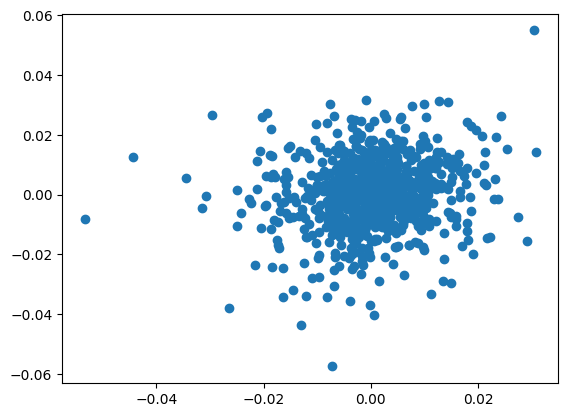

In [102]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [103]:
correlation

PearsonRResult(statistic=0.1473478058942018, pvalue=4.8195444971903964e-05)

The correlation between both factors is -0.07


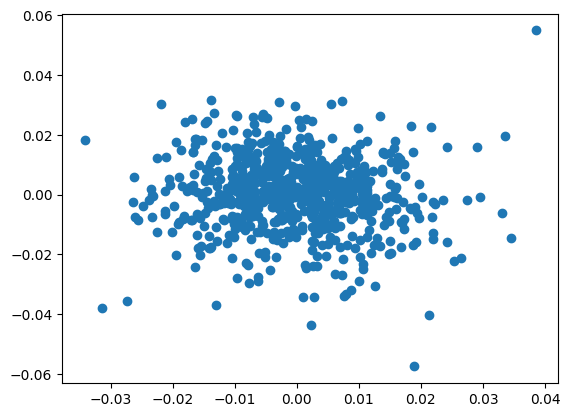

In [104]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [105]:
correlation_tlt

PearsonRResult(statistic=-0.065192854773613, pvalue=0.07341244738669452)

The correlation between both factors is 0.28


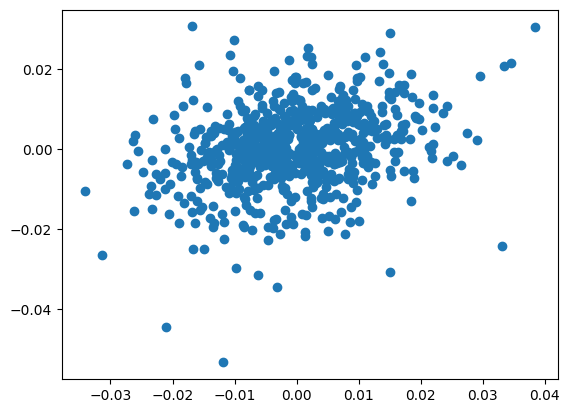

In [106]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [107]:
correlation_gld

PearsonRResult(statistic=0.2819170124394642, pvalue=2.9232082949075403e-15)

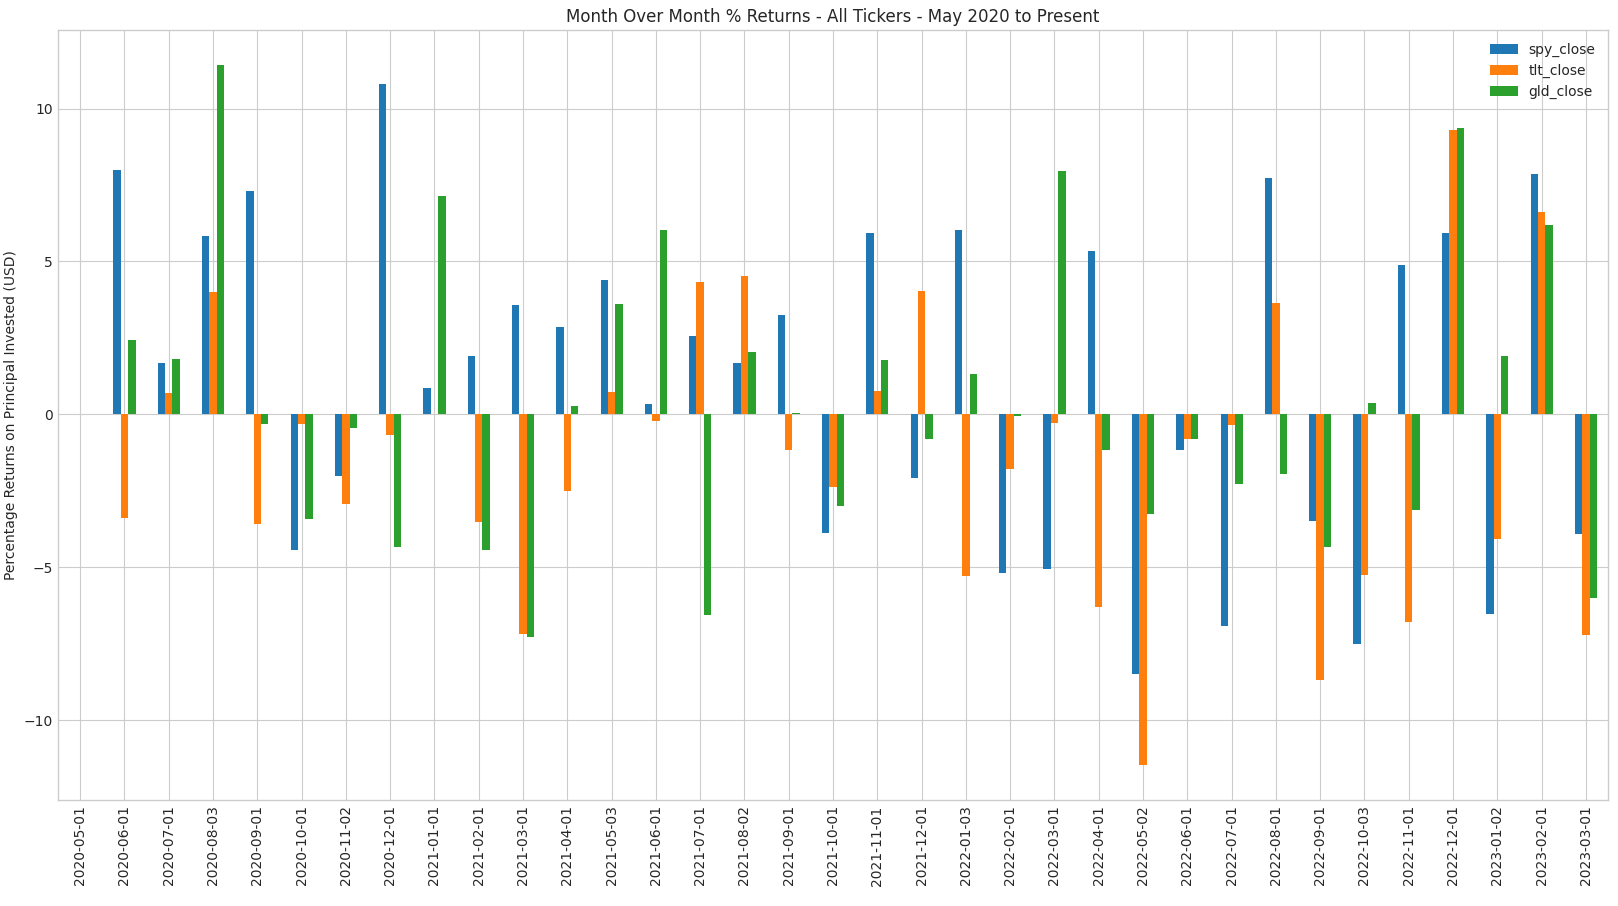

In [108]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [109]:
tlt_pct.max()

0.09290069236333576

In [110]:
gld_pct.max()

0.11415196254951376

In [111]:
spy_pct.max()

0.10796813955601303

In [112]:
tlt_pct.min()

-0.11482096993503543

In [113]:
gld_pct.min()

-0.0728921540492452

In [114]:
spy_pct.min()

-0.084871500485737

In [115]:
btc_chg.max()

close    0.594222
dtype: float64

In [116]:
btc_chg.min()

close   -0.355927
dtype: float64

In [117]:
# max_df = pd.DataFrame

In [118]:
# max_df.columns = [['gld_max','spy_max','tlt_max']]
# max_df

In [119]:
# max_df['gld_max'] = gld_pct.max()
# max_df

In [120]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2263    TLT 2023-04-03  105.88  107.0950  105.7000  106.60  18237429.0   
2264    TLT 2023-04-04  105.78  107.8000  105.7500  107.13  18052734.0   
2265    TLT 2023-04-05  107.77  108.3700  107.4100  108.25  23069677.0   
2266    TLT 2023-04-06  108.42  108.8700  108.3900  108.53  16447295.0   
2267    TLT 2023-04-10  107.64  107.7618  106.5600  106.78  19869749.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2263     111192.0  106.534448  
2264     110253.0  107.222297  
2265     141394.0  108.108906  
2266      92370.0  108.599296  
2267     103772.0  106.943490  

[2268 rows x 9 columns]

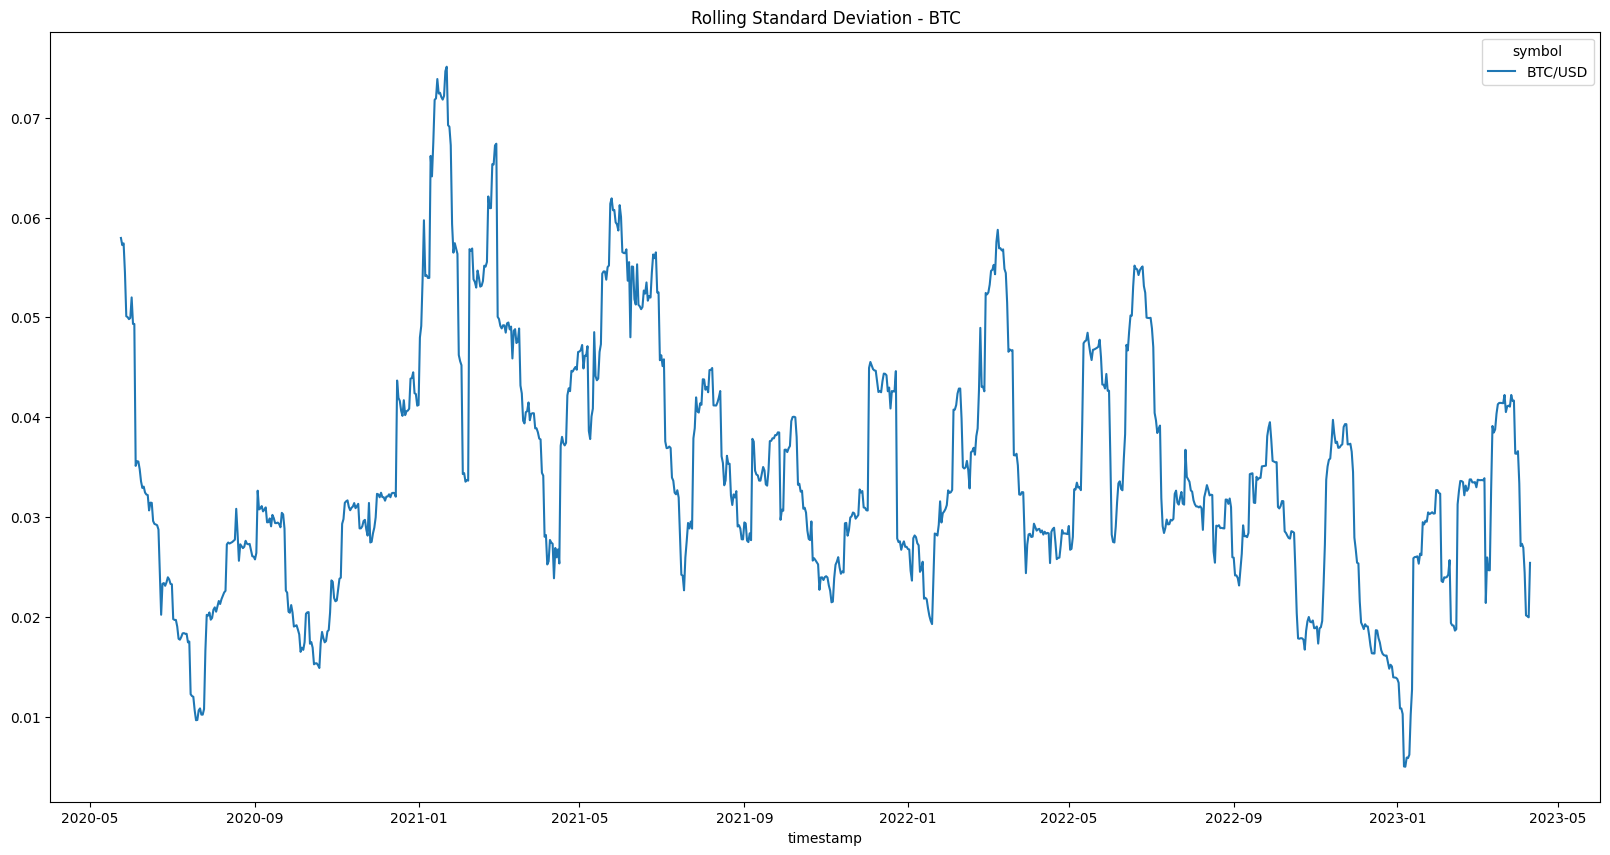

In [121]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolling = btc_daily.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC")

# Plot the rolling standard deviation
btc_rolling;
plt.savefig("Images/RollingSTD_alpaca.png")

In [122]:
# !pip install yfinance

In [123]:
import yfinance as yf

btc_data = yf.Ticker("BTC-USD")

hist = btc_data.history(period="11y")

hist

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-04-06 00:00:00+00:00  28175.226562  28178.384766  27738.759766   
2023-04-07 00:00:00+00:00  28038.966797  28111.593750  27794.031250   
2023-04-08 00:00:00+00:00  27920.513672  28159.863281  27883.386719   
2023-04-09 00:00:00+00:00  27952.367188  28532.830078  27828.480469   
2023-04-11 00:00:00+00:00  29651.876953  30283.833984  29614.330078   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800        0.0           0.0  
2014-09-18 00:00:00+00:00    424.440002     34483200        0.0           0.0  
2014-09-19 00:00:00+00:00    394.795990     37919700        0.0           0.0  
2014-09-20 00:00:00+00:00    408.903992     36863600        0.0           0.0  
2014-09-21 00:00:00+00:00    398.821014     26580100        0.0           0.0  
...                                 ...          ...        ...           ...  
2023-04-06 00:00:00+00:00  28044.140625  13837809380        0.0           0.0  
2023-04-07 00:00:00+00:00  27925.859375  10861680497        0.0           0.0  
2023-04-08 00:00:00+00:00  27947.794922   9373255556        0.0           0.0  
2023-04-09 00:00:00+00:00  28333.050781  12175322951        0.0           0.0  
2023-04-11 00:00:00+00:00  30283.833984  21551919104        0.0           0.0  

[3128 rows x 7 columns]

In [124]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3128 entries, 2014-09-17 00:00:00+00:00 to 2023-04-11 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3128 non-null   float64
 1   High          3128 non-null   float64
 2   Low           3128 non-null   float64
 3   Close         3128 non-null   float64
 4   Volume        3128 non-null   int64  
 5   Dividends     3128 non-null   float64
 6   Stock Splits  3128 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 195.5 KB


In [125]:
hist_reset = hist.reset_index()
hist_reset

Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3123 2023-04-06 00:00:00+00:00  28175.226562  28178.384766  27738.759766   
3124 2023-04-07 00:00:00+00:00  28038.966797  28111.593750  27794.031250   
3125 2023-04-08 00:00:00+00:00  27920.513672  28159.863281  27883.386719   
3126 2023-04-09 00:00:00+00:00  27952.367188  28532.830078  27828.480469   
3127 2023-04-11 00:00:00+00:00  29651.876953  30283.833984  29614.330078   

             Close       Volume  Dividends  Stock Splits  
0       457.334015     21056800        0.0           0.0  
1       424.440002     34483200        0.0           0.0  
2       394.795990     37919700        0.0           0.0  
3       408.903992     36863600        0.0           0.0  
4       398.821014     26580100        0.0           0.0  
...            ...          ...        ...           ...  
3123  28044.140625  13837809380        0.0           0.0  
3124  27925.859375  10861680497        0.0           0.0  
3125  27947.794922   9373255556        0.0           0.0  
3126  28333.050781  12175322951        0.0           0.0  
3127  30283.833984  21551919104        0.0           0.0  

[3128 rows x 8 columns]

In [126]:
hist_reset['Date'] = hist_reset['Date'].dt.date
hist_reset

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3123  2023-04-06  28175.226562  28178.384766  27738.759766  28044.140625   
3124  2023-04-07  28038.966797  28111.593750  27794.031250  27925.859375   
3125  2023-04-08  27920.513672  28159.863281  27883.386719  27947.794922   
3126  2023-04-09  27952.367188  28532.830078  27828.480469  28333.050781   
3127  2023-04-11  29651.876953  30283.833984  29614.330078  30283.833984   

           Volume  Dividends  Stock Splits  
0        21056800        0.0           0.0  
1        34483200        0.0           0.0  
2        37919700        0.0           0.0  
3        36863600        0.0           0.0  
4        26580100        0.0           0.0  
...           ...        ...           ...  
3123  13837809380        0.0           0.0  
3124  10861680497        0.0           0.0  
3125   9373255556        0.0           0.0  
3126  12175322951        0.0           0.0  
3127  21551919104        0.0           0.0  

[3128 rows x 8 columns]

In [127]:
# Grabbing subset of timestamp and closing prices 
btc_sub = hist_reset[['Date', 'Close']].set_index('Date')
btc_sub

Close
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2023-04-06  28044.140625
2023-04-07  27925.859375
2023-04-08  27947.794922
2023-04-09  28333.050781
2023-04-11  30283.833984

[3128 rows x 1 columns]

In [128]:
# Calculating month over month pct change
btc_c = btc_sub.pct_change()
btc_c

Close
Date                
2014-09-17       NaN
2014-09-18 -0.071926
2014-09-19 -0.069843
2014-09-20  0.035735
2014-09-21 -0.024659
...              ...
2023-04-06 -0.004750
2023-04-07 -0.004218
2023-04-08  0.000785
2023-04-09  0.013785
2023-04-11  0.068852

[3128 rows x 1 columns]

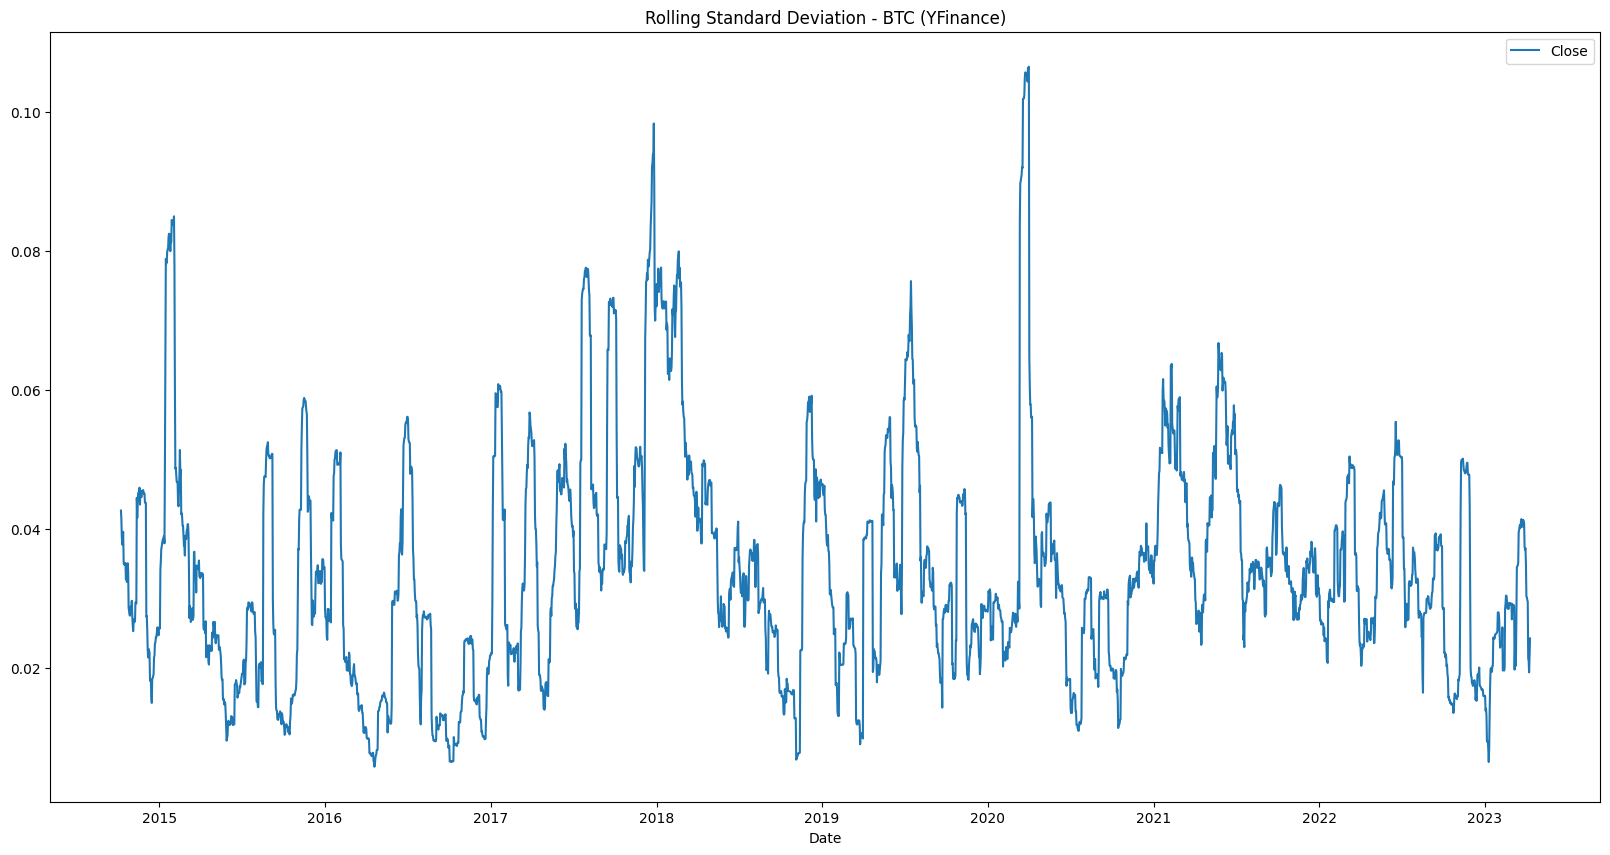

In [129]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_roll = btc_c.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (YFinance)")

# Plot the rolling standard deviation
btc_roll;
plt.savefig("Images/RollingSTD_yfinance.png")

In [130]:
yf_data = yf.download("BTC-USD", start="2011-01-01", end="2012-01-01")
yf_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: Data doesn't exist for startDate = 1293840000, endDate = 1325376000


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [131]:
# !pip install quandl

In [132]:
import quandl


In [133]:
# Save API Key for Quandl to Access
# quandl.save_key("Qt-Hvw9fyivUQYEhHsMF")
# print(quandl.ApiConfig.api_key)

In [134]:
# Import API Key securely
quandl.read_key()

In [135]:
# Grabbing BTC Data from Quandl
data_q = quandl.get('BCHAIN/MKPRU')  # Format is: `DATABASE_CODE/DATASET_CODE`
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-04-03  28185.20
2023-04-04  27802.23
2023-04-05  28169.50
2023-04-06  28180.40
2023-04-07  28039.94

[5209 rows x 1 columns]

In [136]:
data_q.isnull().sum()

Value    0
dtype: int64

In [137]:
# Calculating month over month pct change
btc_q = data_q.pct_change()
btc_q

Value
Date                
2009-01-02       NaN
2009-01-03       NaN
2009-01-04       NaN
2009-01-05       NaN
2009-01-06       NaN
...              ...
2023-04-03 -0.009831
2023-04-04 -0.013588
2023-04-05  0.013210
2023-04-06  0.000387
2023-04-07 -0.004984

[5209 rows x 1 columns]

In [138]:
btc_qna = btc_q.dropna()
btc_qna

Value
Date                
2010-08-16       inf
2010-08-17 -1.000000
2010-08-18       inf
2010-08-19 -0.030523
2010-08-20  0.049475
...              ...
2023-04-03 -0.009831
2023-04-04 -0.013588
2023-04-05  0.013210
2023-04-06  0.000387
2023-04-07 -0.004984

[4618 rows x 1 columns]

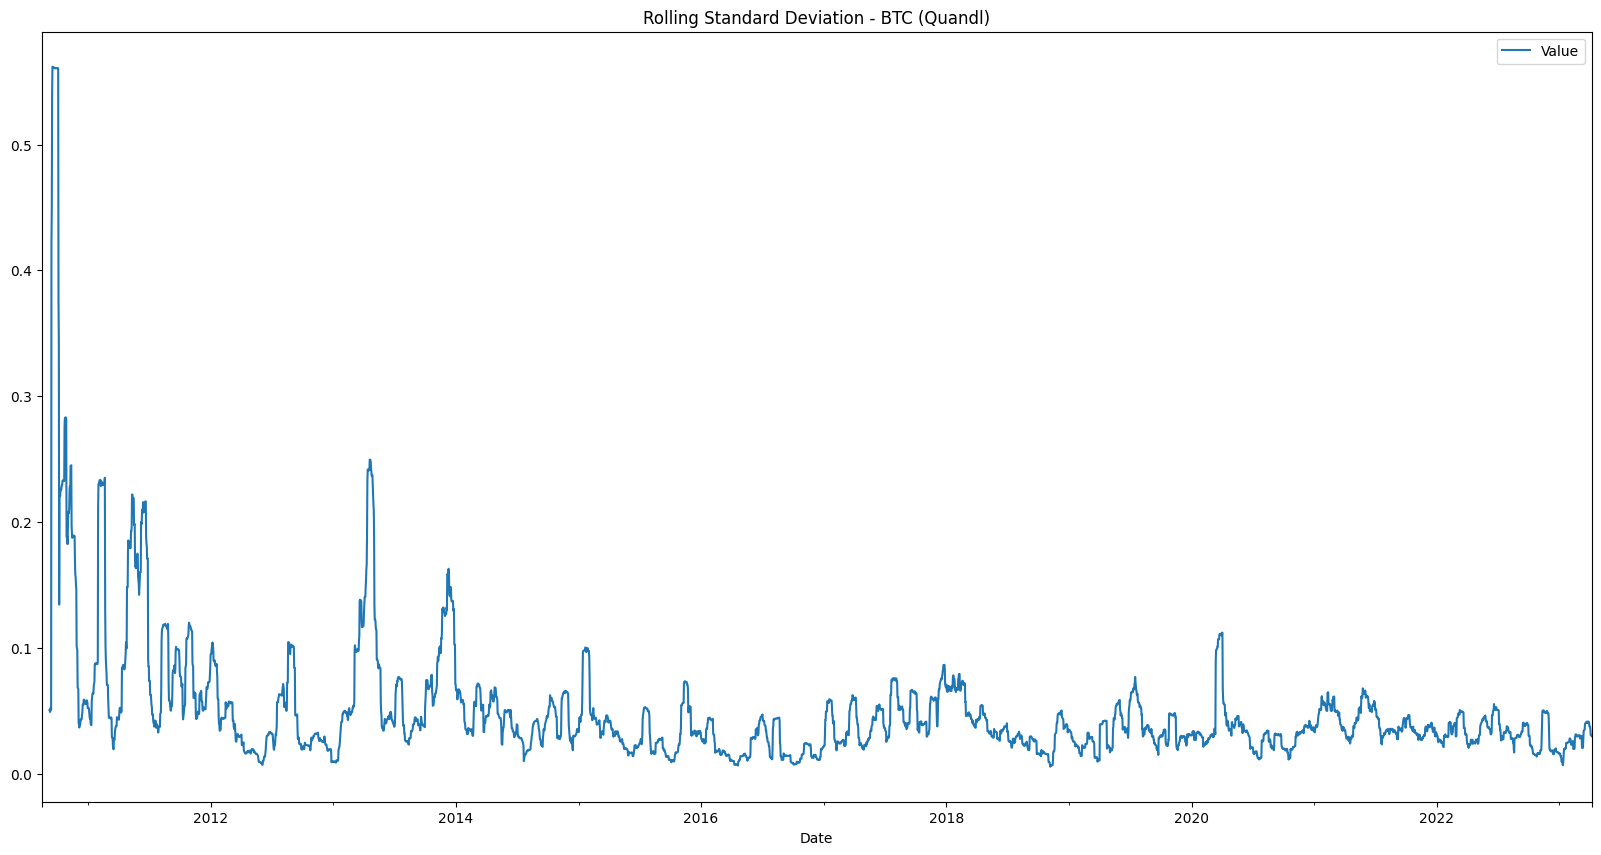

In [139]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolled = btc_qna.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolled;
plt.savefig("Images/RollingSTD_quandl.png")

In [140]:
data_slice = data_q['2010-09-15':'2023']
data_slice

Value
Date                    
2010-09-15      0.061900
2010-09-16      0.150000
2010-09-17      0.060900
2010-09-18      0.062599
2010-09-19      0.060000
...                  ...
2023-04-03  28185.200000
2023-04-04  27802.230000
2023-04-05  28169.500000
2023-04-06  28180.400000
2023-04-07  28039.940000

[4588 rows x 1 columns]

In [141]:
# Calculating month over month pct change
btc_cambio = data_slice.pct_change()
btc_cambio

Value
Date                
2010-09-15       NaN
2010-09-16  1.423263
2010-09-17 -0.594000
2010-09-18  0.027898
2010-09-19 -0.041518
...              ...
2023-04-03 -0.009831
2023-04-04 -0.013588
2023-04-05  0.013210
2023-04-06  0.000387
2023-04-07 -0.004984

[4588 rows x 1 columns]

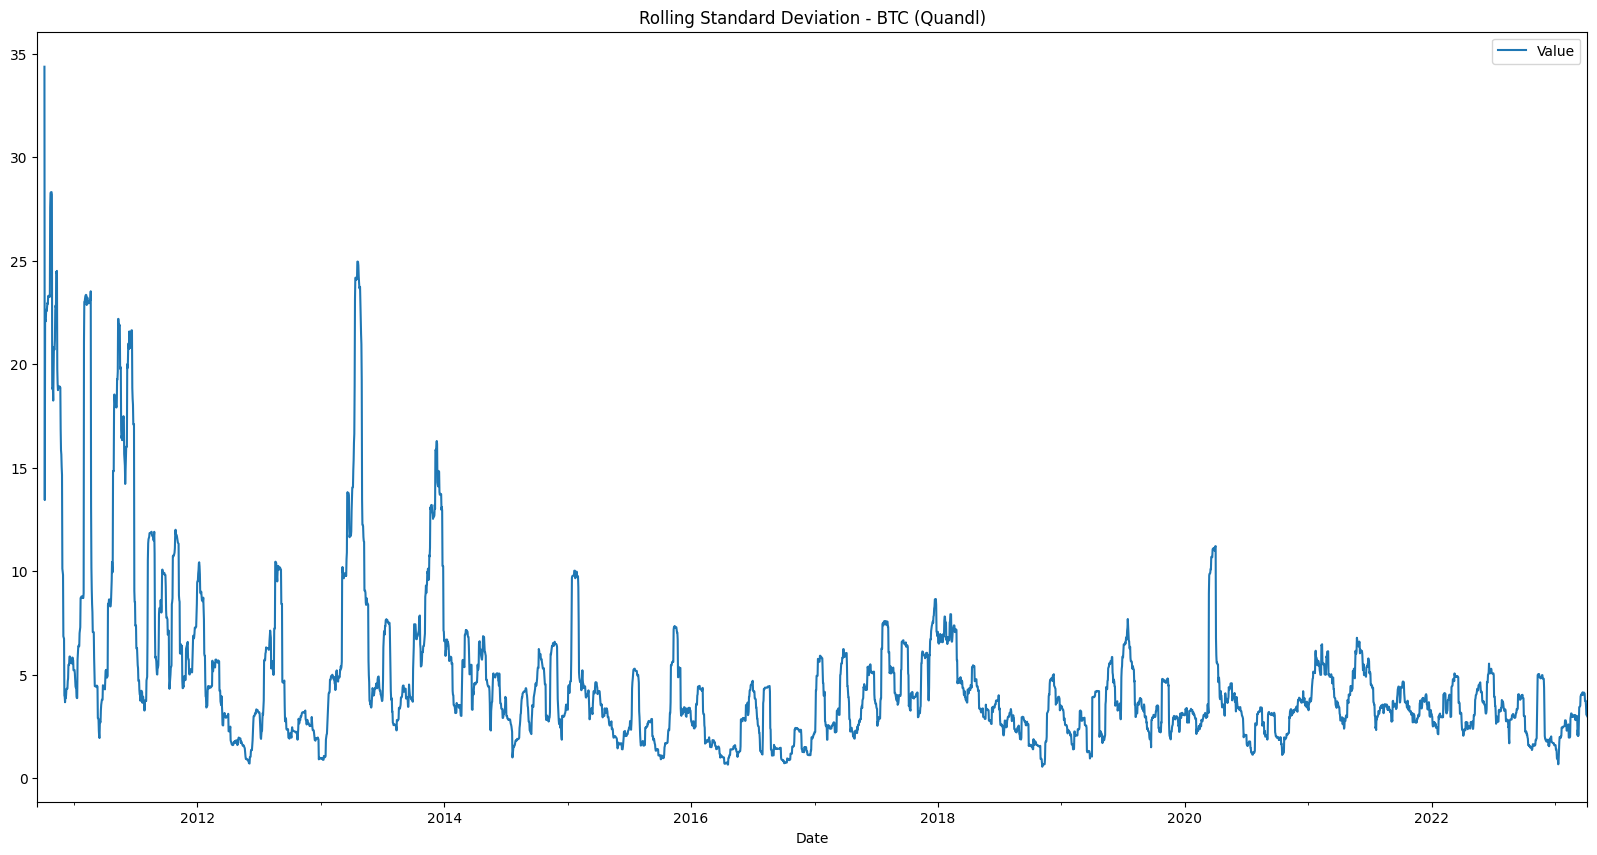

In [142]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolls = (btc_cambio*100).rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolls;
plt.savefig("Images/RollingSTD_quandl_sept.png")

In [143]:
# Grabbing last 30 days
btc_last_30 = btc_df.tail(30)
btc_last_30

symbol  timestamp      open      high       low     close  \
1038  BTC/USD 2023-03-12  20540.16  22788.13  20439.99  22393.38   
1039  BTC/USD 2023-03-13  22388.90  24577.92  21875.00  24539.36   
1040  BTC/USD 2023-03-14  24540.48  26476.04  24000.00  24920.00   
1041  BTC/USD 2023-03-15  24911.09  25305.59  23930.00  24345.77   
1042  BTC/USD 2023-03-16  24349.16  25964.00  24309.40  25735.57   
1043  BTC/USD 2023-03-17  25733.00  27830.00  25671.19  27397.67   
1044  BTC/USD 2023-03-18  27404.68  27689.27  26657.61  27204.69   
1045  BTC/USD 2023-03-19  27204.38  28464.43  26905.00  27543.98   
1046  BTC/USD 2023-03-20  27539.12  28560.80  27452.72  28011.82   
1047  BTC/USD 2023-03-21  28014.26  28500.00  27406.01  28292.34   
1048  BTC/USD 2023-03-22  28293.67  28900.00  26685.00  27359.80   
1049  BTC/USD 2023-03-23  27360.42  28772.68  27350.29  28194.57   
1050  BTC/USD 2023-03-24  28188.76  28388.63  27084.27  27582.61   
1051  BTC/USD 2023-03-25  27586.39  27850.00  27180.00  27543.78   
1052  BTC/USD 2023-03-26  27546.35  28238.07  27500.98  27946.58   
1053  BTC/USD 2023-03-27  27947.80  28010.46  26540.00  26994.96   
1054  BTC/USD 2023-03-28  26992.83  27622.24  26674.02  27580.86   
1055  BTC/USD 2023-03-29  27580.86  29189.54  27516.03  28594.44   
1056  BTC/USD 2023-03-30  28599.03  28788.12  27719.21  28193.24   
1057  BTC/USD 2023-03-31  28195.37  28824.80  27529.53  28588.44   
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03   
1059  BTC/USD 2023-04-02  28404.32  28508.68  27579.82  27721.50   
1060  BTC/USD 2023-04-03  27723.97  28522.00  27300.00  27823.92   
1061  BTC/USD 2023-04-04  27827.33  28786.01  27823.59  28513.19   
1062  BTC/USD 2023-04-05  28518.32  28752.57  27861.98  28089.42   
1063  BTC/USD 2023-04-06  28086.02  28197.42  27724.33  28044.99   
1064  BTC/USD 2023-04-07  28042.19  28080.08  27782.43  27999.42   
1065  BTC/USD 2023-04-08  28000.11  28180.00  27885.74  28055.08   
1066  BTC/USD 2023-04-09  28055.09  28551.55  27817.06  28259.98   
1067  BTC/USD 2023-04-10  28261.60  30442.56  28179.00  30366.31   

            volume  trade_count          vwap  
1038   9540.276950     276714.0  21539.545219  
1039  11033.117738     339366.0  23432.668234  
1040  16438.922767     397514.0  25065.230778  
1041  17449.825570     397469.0  24569.795596  
1042  15344.322720     338683.0  24979.821122  
1043  12343.284591     320105.0  26777.771961  
1044   6949.658400     192173.0  27308.022211  
1045  11514.465227     293305.0  27831.853673  
1046  12959.968248     330148.0  28008.056180  
1047  10467.323430     272580.0  28100.890031  
1048  17219.154097     571643.0  27889.946132  
1049  14644.892170     516262.0  28088.700852  
1050  11761.353080     369526.0  27837.485939  
1051   6709.724570     179818.0  27506.953196  
1052   8619.723040     252161.0  27874.871683  
1053  12169.421960     384940.0  27302.902467  
1054  10802.762400     415238.0  27140.698798  
1055  17065.085119     580600.0  28415.669898  
1056  13818.790240     339849.0  28282.496754  
1057  10207.067870     238333.0  28264.484682  
1058   3835.215540      91695.0  28443.351585  
1059   6977.723200     144550.0  28061.981229  
1060  14202.439090     234335.0  28033.088149  
1061  10372.334150     167848.0  28262.442598  
1062   8959.369600     149908.0  28228.581600  
1063   6361.327530     105691.0  27997.279878  
1064   4015.262640      82793.0  27924.334599  
1065   2321.540070      45629.0  28027.762592  
1066   4613.152460      73492.0  28170.555198  
1067   9739.608318     141760.0  29189.449266

In [144]:
# Subset of timestamp and close
btc_30 = btc_last_30[['timestamp','close']]
btc_30

timestamp     close
1038 2023-03-12  22393.38
1039 2023-03-13  24539.36
1040 2023-03-14  24920.00
1041 2023-03-15  24345.77
1042 2023-03-16  25735.57
1043 2023-03-17  27397.67
1044 2023-03-18  27204.69
1045 2023-03-19  27543.98
1046 2023-03-20  28011.82
1047 2023-03-21  28292.34
1048 2023-03-22  27359.80
1049 2023-03-23  28194.57
1050 2023-03-24  27582.61
1051 2023-03-25  27543.78
1052 2023-03-26  27946.58
1053 2023-03-27  26994.96
1054 2023-03-28  27580.86
1055 2023-03-29  28594.44
1056 2023-03-30  28193.24
1057 2023-03-31  28588.44
1058 2023-04-01  28404.03
1059 2023-04-02  27721.50
1060 2023-04-03  27823.92
1061 2023-04-04  28513.19
1062 2023-04-05  28089.42
1063 2023-04-06  28044.99
1064 2023-04-07  27999.42
1065 2023-04-08  28055.08
1066 2023-04-09  28259.98
1067 2023-04-10  30366.31

In [145]:
# Setting timestamp as index
btc_30_index = btc_30.set_index('timestamp')
btc_30_index

close
timestamp           
2023-03-12  22393.38
2023-03-13  24539.36
2023-03-14  24920.00
2023-03-15  24345.77
2023-03-16  25735.57
2023-03-17  27397.67
2023-03-18  27204.69
2023-03-19  27543.98
2023-03-20  28011.82
2023-03-21  28292.34
2023-03-22  27359.80
2023-03-23  28194.57
2023-03-24  27582.61
2023-03-25  27543.78
2023-03-26  27946.58
2023-03-27  26994.96
2023-03-28  27580.86
2023-03-29  28594.44
2023-03-30  28193.24
2023-03-31  28588.44
2023-04-01  28404.03
2023-04-02  27721.50
2023-04-03  27823.92
2023-04-04  28513.19
2023-04-05  28089.42
2023-04-06  28044.99
2023-04-07  27999.42
2023-04-08  28055.08
2023-04-09  28259.98
2023-04-10  30366.31

In [146]:
# Running daily percentage change
btc_last_pct = btc_30_index.pct_change()
btc_last_pct

close
timestamp           
2023-03-12       NaN
2023-03-13  0.095831
2023-03-14  0.015511
2023-03-15 -0.023043
2023-03-16  0.057086
2023-03-17  0.064584
2023-03-18 -0.007044
2023-03-19  0.012472
2023-03-20  0.016985
2023-03-21  0.010014
2023-03-22 -0.032961
2023-03-23  0.030511
2023-03-24 -0.021705
2023-03-25 -0.001408
2023-03-26  0.014624
2023-03-27 -0.034051
2023-03-28  0.021704
2023-03-29  0.036749
2023-03-30 -0.014031
2023-03-31  0.014018
2023-04-01 -0.006451
2023-04-02 -0.024029
2023-04-03  0.003695
2023-04-04  0.024773
2023-04-05 -0.014862
2023-04-06 -0.001582
2023-04-07 -0.001625
2023-04-08  0.001988
2023-04-09  0.007303
2023-04-10  0.074534

In [147]:
# Checking info
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-03-12 to 2023-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [148]:
# Convert index back to string to prep for plotting
btc_last_pct.index = btc_last_pct.index.strftime("%Y-%m-%d")
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-03-12 to 2023-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


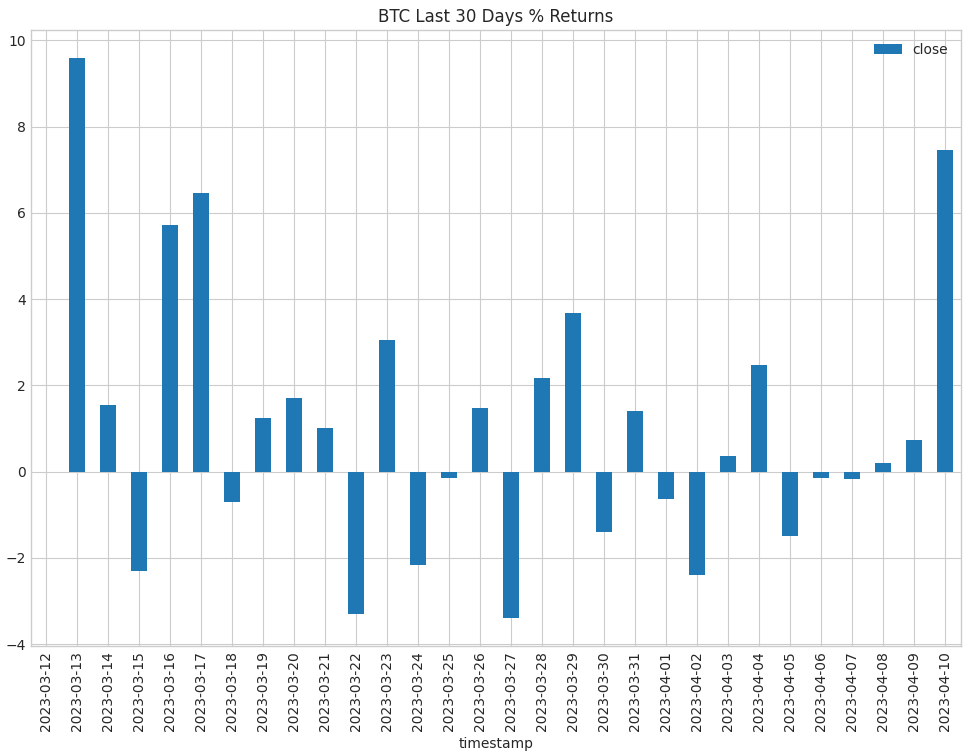

In [149]:
# Plot performance in last 30 days percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_last_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Last 30 Days % Returns");
    plt.savefig("Images/BTCDailyPercentReturns.png")

In [150]:
import plotly.express as px

In [151]:
# Comparing Plotly
fig = px.bar(btc_last_pct*100, 
  y="close",
  x=btc_last_pct.index,
  title="BTC Last 30 Days % Returns",
  template="simple_white",
  labels={"close": "Daily Change (%)"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='Days', dtick="d1")

fig.update_layout(title_x=0.5, xaxis_tickformat='%d-%b')

# fig.write_image("Images/plotly_btc_last_30.png")

In [152]:
min_df = pd.DataFrame({'gld_min': [0,1,2],
                       'tlt_min': [1,2,3],
                       'spy_min': [2,3,4]})
min_df

gld_min  tlt_min  spy_min
0        0        1        2
1        1        2        3
2        2        3        4

In [153]:
# initialize data of lists.
datas = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
dfs = pd.DataFrame(datas)
  
# Print the output.
dfs

Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18

In [154]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

symbol  timestamp    open      high       low   close      volume  \
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
15      GLD 2020-04-30  160.22  160.8200  158.1300  158.80  13633483.0   
26      GLD 2020-05-15  164.02  164.8000  163.0800  163.93  13918816.0   
46      GLD 2020-06-15  160.52  162.5600  160.1600  162.33   8538826.0   
57      GLD 2020-06-30  166.31  167.9906  166.1850  167.37  12762597.0   
...     ...        ...     ...       ...       ...     ...         ...   
2220    TLT 2023-01-31  106.98  107.2800  105.8700  107.17  13706800.0   
2231    TLT 2023-02-15  103.55  103.9500  102.4950  103.05  15881281.0   
2239    TLT 2023-02-28  100.57  101.7200  100.2800  101.71  14956342.0   
2250    TLT 2023-03-15  106.78  107.7100  105.3450  106.10  45174032.0   
2262    TLT 2023-03-31  105.35  106.5600  105.0750  106.37  22338075.0   

      trade_count        vwap  
4         95518.0  161.749049  
15       107884.0  159.269773  
26       103072.0  164.068763  
46        60744.0  161.585502  
57        84161.0  167.268997  
...           ...         ...  
2220      90604.0  106.551306  
2231     102691.0  103.037636  
2239     100754.0  101.091431  
2250     339908.0  106.690206  
2262     125397.0  105.921266  

[156 rows x 9 columns]

In [155]:
month_end_df.tail(33)

symbol  timestamp      open     high      low   close      volume  \
1810    TLT 2021-06-15  140.8000  141.090  140.480  141.05  18177787.0   
1821    TLT 2021-06-30  144.2500  144.930  144.070  144.35  15707427.0   
1831    TLT 2021-07-15  147.9500  148.600  147.030  148.49  18454932.0   
1864    TLT 2021-08-31  149.6700  150.090  148.500  148.83  15253807.0   
1874    TLT 2021-09-15  151.2100  151.250  149.930  150.58  11936274.0   
1885    TLT 2021-09-30  144.1000  144.515  143.650  144.32  22513240.0   
1896    TLT 2021-10-15  145.0000  145.140  144.470  145.03  11794328.0   
1917    TLT 2021-11-15  146.8900  146.960  145.220  145.48  15229963.0   
1927    TLT 2021-11-30  150.8300  152.070  150.250  151.59  31467481.0   
1938    TLT 2021-12-15  149.6139  150.790  149.130  149.25  25368709.0   
1949    TLT 2021-12-31  147.8100  149.030  147.430  148.19  13395043.0   
1969    TLT 2022-01-31  142.1800  142.950  141.960  142.39  13985524.0   
1980    TLT 2022-02-15  135.6000  135.840  134.940  134.98  18124291.0   
1988    TLT 2022-02-28  138.4300  140.045  138.320  139.87  25520768.0   
1999    TLT 2022-03-15  132.8600  133.150  131.190  131.53  17260850.0   
2011    TLT 2022-03-31  131.9800  132.670  131.660  132.08  19893042.0   
2052    TLT 2022-05-31  117.1800  117.230  115.928  116.56  28249674.0   
2063    TLT 2022-06-15  110.0850  110.990  109.030  110.84  24146569.0   
2073    TLT 2022-06-30  114.8590  115.770  114.750  114.87  25802876.0   
2083    TLT 2022-07-15  115.8400  116.820  115.600  116.14  16022586.0   
2104    TLT 2022-08-15  116.3300  116.745  115.450  115.45   9031814.0   
2116    TLT 2022-08-31  112.6900  113.340  111.575  111.88  13617930.0   
2126    TLT 2022-09-15  107.8500  108.190  107.580  107.97  10394405.0   
2137    TLT 2022-09-30  104.2700  104.860  102.225  102.45  26484990.0   
2158    TLT 2022-10-31   96.3600   96.620   95.030   96.11  23956265.0   
2169    TLT 2022-11-15   98.2500   99.300   98.110   99.23  26585624.0   
2179    TLT 2022-11-30  101.6150  102.730  101.370  102.73  21594217.0   
2190    TLT 2022-12-15  108.3900  109.120  108.160  108.32  20255470.0   
2220    TLT 2023-01-31  106.9800  107.280  105.870  107.17  13706800.0   
2231    TLT 2023-02-15  103.5500  103.950  102.495  103.05  15881281.0   
2239    TLT 2023-02-28  100.5700  101.720  100.280  101.71  14956342.0   
2250    TLT 2023-03-15  106.7800  107.710  105.345  106.10  45174032.0   
2262    TLT 2023-03-31  105.3500  106.560  105.075  106.37  22338075.0   

      trade_count        vwap  
1810      63501.0  140.863603  
1821      76777.0  144.486788  
1831      83696.0  148.104619  
1864      80103.0  148.996281  
1874      72162.0  150.558290  
1885     109556.0  144.155056  
1896      64608.0  144.873370  
1917      85769.0  145.786411  
1927     218198.0  151.399185  
1938     159167.0  149.983254  
1949      80937.0  148.211890  
1969      85292.0  142.435123  
1980      98264.0  135.321390  
1988     145092.0  139.369096  
1999     121898.0  131.956025  
2011     135009.0  132.282619  
2052     129017.0  116.706060  
2063     163693.0  109.876568  
2073     125548.0  115.303059  
2083      86522.0  116.227225  
2104      55570.0  116.024302  
2116      88542.0  112.351215  
2126      68284.0  107.872767  
2137     176869.0  103.216833  
2158     139205.0   95.885319  
2169     155459.0   98.868782  
2179     143566.0  102.184996  
2190     112012.0  108.578492  
2220      90604.0  106.551306  
2231     102691.0  103.037636  
2239     100754.0  101.091431  
2250     339908.0  106.690206  
2262     125397.0  105.921266

In [156]:
Introducing MSTR
TSLA?
BTC : SPY ratio


SyntaxError: invalid syntax (813749698.py, line 1)

In [ ]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df